# Building your first fully connected network and a CNN 

## Building a simple fully connected network (a Multi-Layer Perceptron)

Let's set up the paths and make a dataset again:

In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from utils.data_handling import WCH5Dataset

Now Let's make our model. We'll talk about 
  - model parameters
  - inputs and the forward method
  - Modules containing modules
  - Sequential Module  
  Lets open [simpleMLP](/edit/models/simpleMLP.py)

In [3]:
from models.simpleMLP import SimpleMLP

In [4]:
model_MLP=SimpleMLP(num_classes=3)

Let's look at the parameters:

In [5]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: fc1.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc1.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc2.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc2.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc3.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc3.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc4.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc4.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc5.weight, type: <class 'torch.nn.parameter.Parameter'>, p

As we can see by default the parameters have `requires_grad` set - i.e. we will be able to obtain gradient of the loss function with respect to these parameters.

Let's quickly look at the [source](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear) for the linear module

The parameters descend from the `Tensor` class. When `Parameter` object is instantiated as a member of a `Module` object class the parameter is added to `Module`s list of parameters automatically. This list and values are captured in the 'state dictionary' of a module:

In [6]:
model_MLP.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0030, -0.0052,  0.0006,  ..., -0.0027,  0.0020,  0.0057],
                      [-0.0046, -0.0009,  0.0046,  ..., -0.0009, -0.0041, -0.0041],
                      [ 0.0022, -0.0052,  0.0043,  ..., -0.0052, -0.0035,  0.0032],
                      ...,
                      [ 0.0022,  0.0008, -0.0031,  ...,  0.0045,  0.0016, -0.0002],
                      [ 0.0041, -0.0035,  0.0062,  ..., -0.0051, -0.0030,  0.0062],
                      [-0.0006,  0.0015, -0.0055,  ...,  0.0054, -0.0028, -0.0046]])),
             ('fc1.bias',
              tensor([ 0.0024,  0.0044, -0.0049,  ..., -0.0017, -0.0028,  0.0010])),
             ('fc2.weight',
              tensor([[-0.0079, -0.0036, -0.0093,  ...,  0.0100, -0.0002, -0.0084],
                      [-0.0030, -0.0063, -0.0027,  ..., -0.0035,  0.0013, -0.0078],
                      [-0.0089,  0.0030,  0.0064,  ..., -0.0048, -0.0062, -0.0044],
                      ...,
                    

Did you notice that the values are not 0? This is actually by design - by default that initialization follows an accepted scheme - but many strategies are possible

Now let's look at sequential version

In [7]:
from models.simpleMLP import SimpleMLPSEQ
model_MLPSEQ=SimpleMLPSEQ(num_classes=3)

In [8]:
for name, param in model_MLPSEQ.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: _sequence.0.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.0.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.2.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.2.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.4.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.4.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.6.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.6.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parame

In [9]:
print(model_MLPSEQ.state_dict())

OrderedDict([('_sequence.0.weight', tensor([[-5.6730e-03,  4.3035e-05,  3.4273e-03,  ..., -4.7161e-03,
          3.8091e-03, -2.4796e-03],
        [-3.8052e-03, -2.4489e-03, -4.8873e-03,  ..., -5.8504e-03,
         -1.2520e-03, -1.9744e-03],
        [ 5.7593e-03, -5.4157e-03,  4.9722e-03,  ...,  7.5231e-04,
          8.6183e-04, -2.3010e-03],
        ...,
        [-2.3209e-03, -1.9252e-03,  1.2489e-03,  ...,  3.8300e-03,
         -2.4312e-03,  6.2498e-03],
        [ 5.8145e-03, -3.2090e-04, -2.4354e-03,  ...,  8.2329e-04,
         -5.1515e-03, -5.6641e-03],
        [-3.2139e-03, -2.4379e-03, -6.4036e-04,  ...,  6.3237e-03,
         -6.3953e-03,  2.0227e-03]])), ('_sequence.0.bias', tensor([-0.0047,  0.0028,  0.0055,  ...,  0.0015,  0.0060,  0.0038])), ('_sequence.2.weight', tensor([[-0.0099,  0.0100, -0.0089,  ...,  0.0005,  0.0028,  0.0060],
        [-0.0020, -0.0024,  0.0066,  ...,  0.0038,  0.0059,  0.0030],
        [ 0.0024, -0.0079, -0.0079,  ..., -0.0021,  0.0004, -0.0063],
     

As we can see the parameters look similar but have different names

## Training a model

First let's make a dataset object

In [21]:
import numpy as np
transform=np.ravel
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",reduced_dataset_size=50000,val_split=0.1,test_split=0.1,transform=transform)

Reduced size: 50000


Let's make a dataloader and grab a first batch

In [22]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

train_dldr=DataLoader(dset,
                      batch_size=32,
                      shuffle=False,
                      sampler=SubsetRandomSampler(dset.train_indices))
train_iter=iter(train_dldr)

In [23]:
batch0=next(train_iter)

In [24]:
data=batch0[0]
labels=batch0[1]
print(data.shape)
print(16*40*38)
print(32*16*40)

torch.Size([32, 24320])
24320
20480


Now compute the model output on the data

In [25]:
model_out=model_MLP(data)

Now we have model's predictions and we above got 'true' labels from the dataset, so we can now compute the loss - CrossEntropyLoss is the apropropriate one to use here. We will use `CrossEntropyLoss` from `torch.nn` - btw it is also a `Module`. First create it:

In [26]:
from torch.nn import CrossEntropyLoss
loss_module=CrossEntropyLoss()

Now evaluate the loss. 

In [27]:
loss_tensor=loss_module(model_out,labels)

This was a 'forward pass'. We should now have a computational graph available - let's plot it for the kicks...

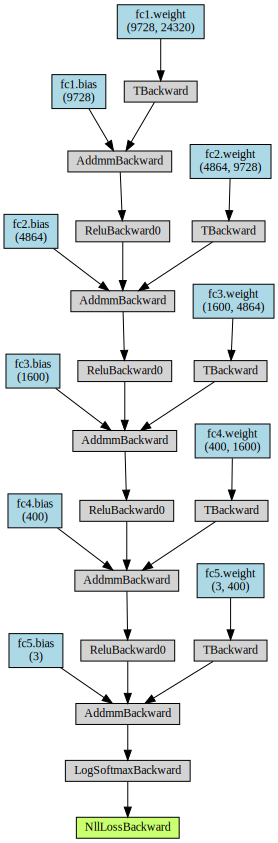

In [28]:
from torchviz import make_dot
make_dot(loss_tensor,params=dict(model_MLP.named_parameters()))

Before we calculate the gradients - let's check what they are now...

In [29]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, gradient: {}".
          format(name, param.grad))

name of a parameter: fc1.weight, gradient: None
name of a parameter: fc1.bias, gradient: None
name of a parameter: fc2.weight, gradient: None
name of a parameter: fc2.bias, gradient: None
name of a parameter: fc3.weight, gradient: None
name of a parameter: fc3.bias, gradient: None
name of a parameter: fc4.weight, gradient: None
name of a parameter: fc4.bias, gradient: None
name of a parameter: fc5.weight, gradient: None
name of a parameter: fc5.bias, gradient: None


No wonder - let's calculate them

In [30]:
loss_tensor.backward()

In [31]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, gradient: {}".
          format(name, param.grad))

name of a parameter: fc1.weight, gradient: tensor([[ 0.0000e+00,  0.0000e+00,  1.5757e-05,  ...,  0.0000e+00,
         -2.0433e-02, -1.4281e-02],
        [ 0.0000e+00, -1.7669e-05,  0.0000e+00,  ..., -6.3083e-04,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  1.9800e-05, -2.2157e-05,  ...,  1.6958e-02,
         -2.3060e-02,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  8.3519e-04,
          7.1538e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -1.1701e-03,
          2.2721e-02,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00, -1.6901e-02]])
name of a parameter: fc1.bias, gradient: tensor([ 1.9116e-05,  1.2373e-05,  2.7602e-05,  ..., -3.2292e-05,
         5.0819e-05,  1.4052e-05])
name of a parameter: fc2.weight, gradient: tensor([[ 1.5359e-02, -2.2907e-04,  5.5948e-03,  ...,  7.8343e-03,
          8.7410e-03,  0.0000e+00],
        [ 5.7290e-03, -8.6586e-04, -1

All we have to do now is subtract the gradient of a given parameter from the parameter tensor itself and do it for all parameters of the model - that should decrease the loss. Normally the gradient is multiplied by a learning rate parameter $\lambda$ so we don't go too far in the loss landscape

In [32]:
lr=0.0001
for param in model_MLP.parameters():
    param.data.add_(-lr*param.grad.data)

call to backward **accumulates** gradients - so we also need to zero the gradient tensors if we want to keep going

In [33]:
for param in model_MLP.parameters():
    param.grad.data.zero_()

There is a much simpler way of doing this - we can use the pytorch [optim](https://pytorch.org/docs/stable/optim.html) classes. This allows us to easily use more advanced optimization options (like momentum or adaptive optimizers like [Adam](https://arxiv.org/abs/1412.6980)):

In [34]:
from torch import optim
optimizer = optim.SGD(model_MLP.parameters(), lr=0.0001)

Lets get a new batch of events

In [35]:
batch1=next(train_iter)

In [36]:
data=batch1[0]
labels=batch1[1]

In [37]:
model_out=model_MLP(data)
loss_tensor=loss_module(model_out,labels)
loss_tensor.backward()
optimizer.step()

We could just put the code above in a loop and be done with it, but the usual practice would be to wrap this functionality in a training object. Here we'll use the [engine](/edit/utils/engine.py) class. Let's examine it. We'll talk about:
  1. Implementation of the training loop
  2. Evaluation on validation set and training and test modes.
  3. Turning evaluation of gradients on and off.
  4. Saving and retrieving the model and optimizer state.

In [38]:
from utils.engine import Engine

Let's first create a configuration object -we'll use this to set up our training engine

In [39]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1024
config.batch_size_train = 32
config.batch_size_val = 2048
config.lr=0.001
config.device = 'gpu'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2
config.dump_path = '../model_state_dumps'


In [40]:
engine=Engine(model_MLP,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190823_165956/


In [41]:
print(vars(config))

{'batch_size_test': 1024, 'batch_size_train': 32, 'batch_size_val': 2048, 'lr': 0.001, 'device': 'gpu', 'num_workers_train': 3, 'num_workers_val': 2, 'num_workers_test': 2, 'dump_path': '../model_state_dumps'}


In [42]:
%%time
engine.train(epochs=2.5,report_interval=10,valid_interval=100)

Epoch 0 Starting @ 2019-08-23 16:59:56
... Iteration 0 ... Epoch 0.00 ... Validation Loss 2.983 ... Validation Accuracy 0.348
Saved checkpoint as: ../model_state_dumps/20190823_165956/SimpleMLP.pth
best validation loss so far!: 2.982717752456665
Saved checkpoint as: ../model_state_dumps/20190823_165956/SimpleMLPBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 3.604 ... Accuracy 0.281
... Iteration 11 ... Epoch 0.01 ... Loss 1.110 ... Accuracy 0.344
... Iteration 21 ... Epoch 0.02 ... Loss 1.147 ... Accuracy 0.406
... Iteration 31 ... Epoch 0.02 ... Loss 1.055 ... Accuracy 0.531
... Iteration 41 ... Epoch 0.03 ... Loss 0.957 ... Accuracy 0.562
... Iteration 51 ... Epoch 0.04 ... Loss 0.954 ... Accuracy 0.500
... Iteration 61 ... Epoch 0.05 ... Loss 0.950 ... Accuracy 0.594
... Iteration 71 ... Epoch 0.06 ... Loss 0.900 ... Accuracy 0.562
... Iteration 81 ... Epoch 0.06 ... Loss 0.953 ... Accuracy 0.562
... Iteration 91 ... Epoch 0.07 ... Loss 0.967 ... Accuracy 0.500
... Iteration 100 .

... Iteration 881 ... Epoch 0.70 ... Loss 0.467 ... Accuracy 0.688
... Iteration 891 ... Epoch 0.71 ... Loss 0.459 ... Accuracy 0.781
starting over on the validation set
... Iteration 900 ... Epoch 0.72 ... Validation Loss 0.481 ... Validation Accuracy 0.731
Saved checkpoint as: ../model_state_dumps/20190823_165956/SimpleMLP.pth
... Iteration 901 ... Epoch 0.72 ... Loss 0.450 ... Accuracy 0.688
... Iteration 911 ... Epoch 0.73 ... Loss 0.359 ... Accuracy 0.812
... Iteration 921 ... Epoch 0.74 ... Loss 0.504 ... Accuracy 0.625
... Iteration 931 ... Epoch 0.74 ... Loss 0.466 ... Accuracy 0.656
... Iteration 941 ... Epoch 0.75 ... Loss 0.441 ... Accuracy 0.812
... Iteration 951 ... Epoch 0.76 ... Loss 0.425 ... Accuracy 0.719
... Iteration 961 ... Epoch 0.77 ... Loss 0.419 ... Accuracy 0.781
... Iteration 971 ... Epoch 0.78 ... Loss 0.563 ... Accuracy 0.625
... Iteration 981 ... Epoch 0.78 ... Loss 0.544 ... Accuracy 0.562
... Iteration 991 ... Epoch 0.79 ... Loss 0.524 ... Accuracy 0.688

... Iteration 1771 ... Epoch 1.42 ... Loss 0.382 ... Accuracy 0.781
... Iteration 1781 ... Epoch 1.42 ... Loss 0.241 ... Accuracy 0.875
... Iteration 1791 ... Epoch 1.43 ... Loss 0.535 ... Accuracy 0.656
... Iteration 1801 ... Epoch 1.44 ... Loss 0.312 ... Accuracy 0.875
... Iteration 1811 ... Epoch 1.45 ... Loss 0.354 ... Accuracy 0.812
... Iteration 1821 ... Epoch 1.46 ... Loss 0.491 ... Accuracy 0.688
... Iteration 1831 ... Epoch 1.46 ... Loss 0.438 ... Accuracy 0.719
... Iteration 1841 ... Epoch 1.47 ... Loss 0.359 ... Accuracy 0.781
... Iteration 1850 ... Epoch 1.48 ... Validation Loss 0.477 ... Validation Accuracy 0.740
Saved checkpoint as: ../model_state_dumps/20190823_165956/SimpleMLP.pth
... Iteration 1851 ... Epoch 1.48 ... Loss 0.481 ... Accuracy 0.656
... Iteration 1861 ... Epoch 1.49 ... Loss 0.501 ... Accuracy 0.688
... Iteration 1871 ... Epoch 1.50 ... Loss 0.509 ... Accuracy 0.656
... Iteration 1881 ... Epoch 1.50 ... Loss 0.539 ... Accuracy 0.688
... Iteration 1891 ...

... Iteration 2721 ... Epoch 2.18 ... Loss 0.191 ... Accuracy 0.938
... Iteration 2731 ... Epoch 2.18 ... Loss 0.259 ... Accuracy 0.875
... Iteration 2741 ... Epoch 2.19 ... Loss 0.304 ... Accuracy 0.875
... Iteration 2751 ... Epoch 2.20 ... Loss 0.428 ... Accuracy 0.812
... Iteration 2761 ... Epoch 2.21 ... Loss 0.215 ... Accuracy 0.906
... Iteration 2771 ... Epoch 2.22 ... Loss 0.434 ... Accuracy 0.781
... Iteration 2781 ... Epoch 2.22 ... Loss 0.315 ... Accuracy 0.875
... Iteration 2791 ... Epoch 2.23 ... Loss 0.503 ... Accuracy 0.750
... Iteration 2800 ... Epoch 2.24 ... Validation Loss 0.466 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190823_165956/SimpleMLP.pth
... Iteration 2801 ... Epoch 2.24 ... Loss 0.282 ... Accuracy 0.844
... Iteration 2811 ... Epoch 2.25 ... Loss 0.247 ... Accuracy 0.844
... Iteration 2821 ... Epoch 2.26 ... Loss 0.493 ... Accuracy 0.750
... Iteration 2831 ... Epoch 2.26 ... Loss 0.237 ... Accuracy 0.906
... Iteration 2841 ...

## Defining a simple Convolutional Network

Let's open [simpleCNN](http://localhost:8888/edit/models/simpleCNN.py)

In [43]:
from models.simpleCNN import SimpleCNN
model_CNN=SimpleCNN(num_input_channels=38,num_classes=3)

In [44]:
import numpy as np
def rotate_chan(x):
    return np.transpose(x,(2,0,1))

In [45]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1,transform=rotate_chan)

In [46]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190823_171417/


In [47]:
for name, param in model_CNN.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: f_embed.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_embed.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv1.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv1.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2a.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2a.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2b.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2b.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv3a.weight, type: 

In [48]:
%%time
engine.train(epochs=5,report_interval=10,valid_interval=100)

Epoch 0 Starting @ 2019-08-23 17:14:17
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.124 ... Validation Accuracy 0.336
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
best validation loss so far!: 1.123669147491455
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNNBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 1.122 ... Accuracy 0.375
... Iteration 11 ... Epoch 0.00 ... Loss 1.116 ... Accuracy 0.312
... Iteration 21 ... Epoch 0.00 ... Loss 1.101 ... Accuracy 0.312
... Iteration 31 ... Epoch 0.00 ... Loss 1.086 ... Accuracy 0.531
... Iteration 41 ... Epoch 0.00 ... Loss 1.091 ... Accuracy 0.469
... Iteration 51 ... Epoch 0.00 ... Loss 1.093 ... Accuracy 0.312
... Iteration 61 ... Epoch 0.00 ... Loss 1.087 ... Accuracy 0.469
... Iteration 71 ... Epoch 0.00 ... Loss 1.084 ... Accuracy 0.281
... Iteration 81 ... Epoch 0.00 ... Loss 1.087 ... Accuracy 0.281
... Iteration 91 ... Epoch 0.00 ... Loss 1.082 ... Accuracy 0.281
... Iteration 100 .

... Iteration 861 ... Epoch 0.04 ... Loss 0.595 ... Accuracy 0.688
... Iteration 871 ... Epoch 0.04 ... Loss 0.550 ... Accuracy 0.781
... Iteration 881 ... Epoch 0.04 ... Loss 0.501 ... Accuracy 0.750
... Iteration 891 ... Epoch 0.04 ... Loss 0.641 ... Accuracy 0.656
... Iteration 900 ... Epoch 0.04 ... Validation Loss 0.524 ... Validation Accuracy 0.711
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
best validation loss so far!: 0.524307906627655
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNNBEST.pth
... Iteration 901 ... Epoch 0.04 ... Loss 0.477 ... Accuracy 0.719
... Iteration 911 ... Epoch 0.04 ... Loss 0.405 ... Accuracy 0.750
... Iteration 921 ... Epoch 0.04 ... Loss 0.757 ... Accuracy 0.500
... Iteration 931 ... Epoch 0.04 ... Loss 0.506 ... Accuracy 0.750
... Iteration 941 ... Epoch 0.04 ... Loss 0.491 ... Accuracy 0.844
... Iteration 951 ... Epoch 0.04 ... Loss 0.616 ... Accuracy 0.500
... Iteration 961 ... Epoch 0.04 ... Loss 0.6

... Iteration 1800 ... Epoch 0.08 ... Validation Loss 0.440 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
best validation loss so far!: 0.44020047783851624
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNNBEST.pth
... Iteration 1801 ... Epoch 0.08 ... Loss 0.486 ... Accuracy 0.656
... Iteration 1811 ... Epoch 0.08 ... Loss 0.422 ... Accuracy 0.812
... Iteration 1821 ... Epoch 0.08 ... Loss 0.501 ... Accuracy 0.750
... Iteration 1831 ... Epoch 0.08 ... Loss 0.525 ... Accuracy 0.719
... Iteration 1841 ... Epoch 0.08 ... Loss 0.571 ... Accuracy 0.562
... Iteration 1851 ... Epoch 0.08 ... Loss 0.475 ... Accuracy 0.656
... Iteration 1861 ... Epoch 0.08 ... Loss 0.529 ... Accuracy 0.656
... Iteration 1871 ... Epoch 0.08 ... Loss 0.520 ... Accuracy 0.719
... Iteration 1881 ... Epoch 0.08 ... Loss 0.535 ... Accuracy 0.688
... Iteration 1891 ... Epoch 0.08 ... Loss 0.450 ... Accuracy 0.781
... Iteration 1900 ... Epoch 0.0

... Iteration 2721 ... Epoch 0.12 ... Loss 0.425 ... Accuracy 0.812
... Iteration 2731 ... Epoch 0.12 ... Loss 0.492 ... Accuracy 0.656
... Iteration 2741 ... Epoch 0.12 ... Loss 0.354 ... Accuracy 0.906
... Iteration 2751 ... Epoch 0.12 ... Loss 0.460 ... Accuracy 0.719
... Iteration 2761 ... Epoch 0.12 ... Loss 0.390 ... Accuracy 0.750
... Iteration 2771 ... Epoch 0.12 ... Loss 0.480 ... Accuracy 0.781
... Iteration 2781 ... Epoch 0.12 ... Loss 0.489 ... Accuracy 0.688
... Iteration 2791 ... Epoch 0.12 ... Loss 0.413 ... Accuracy 0.781
... Iteration 2800 ... Epoch 0.12 ... Validation Loss 0.456 ... Validation Accuracy 0.759
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 2801 ... Epoch 0.12 ... Loss 0.355 ... Accuracy 0.812
... Iteration 2811 ... Epoch 0.12 ... Loss 0.435 ... Accuracy 0.719
... Iteration 2821 ... Epoch 0.13 ... Loss 0.561 ... Accuracy 0.656
... Iteration 2831 ... Epoch 0.13 ... Loss 0.498 ... Accuracy 0.719
... Iteration 2841 ...

... Iteration 3681 ... Epoch 0.16 ... Loss 0.376 ... Accuracy 0.812
... Iteration 3691 ... Epoch 0.16 ... Loss 0.396 ... Accuracy 0.781
... Iteration 3700 ... Epoch 0.16 ... Validation Loss 0.401 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
best validation loss so far!: 0.4006199836730957
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNNBEST.pth
... Iteration 3701 ... Epoch 0.16 ... Loss 0.414 ... Accuracy 0.812
... Iteration 3711 ... Epoch 0.16 ... Loss 0.385 ... Accuracy 0.812
... Iteration 3721 ... Epoch 0.17 ... Loss 0.560 ... Accuracy 0.656
... Iteration 3731 ... Epoch 0.17 ... Loss 0.451 ... Accuracy 0.906
... Iteration 3741 ... Epoch 0.17 ... Loss 0.310 ... Accuracy 0.844
... Iteration 3751 ... Epoch 0.17 ... Loss 0.322 ... Accuracy 0.812
... Iteration 3761 ... Epoch 0.17 ... Loss 0.360 ... Accuracy 0.812
... Iteration 3771 ... Epoch 0.17 ... Loss 0.531 ... Accuracy 0.656
... Iteration 3781 ... Epoch 0.17

... Iteration 4631 ... Epoch 0.21 ... Loss 0.433 ... Accuracy 0.719
... Iteration 4641 ... Epoch 0.21 ... Loss 0.380 ... Accuracy 0.844
... Iteration 4651 ... Epoch 0.21 ... Loss 0.436 ... Accuracy 0.750
... Iteration 4661 ... Epoch 0.21 ... Loss 0.319 ... Accuracy 0.906
... Iteration 4671 ... Epoch 0.21 ... Loss 0.358 ... Accuracy 0.844
... Iteration 4681 ... Epoch 0.21 ... Loss 0.392 ... Accuracy 0.844
... Iteration 4691 ... Epoch 0.21 ... Loss 0.449 ... Accuracy 0.688
... Iteration 4700 ... Epoch 0.21 ... Validation Loss 0.401 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 4701 ... Epoch 0.21 ... Loss 0.466 ... Accuracy 0.656
... Iteration 4711 ... Epoch 0.21 ... Loss 0.596 ... Accuracy 0.625
... Iteration 4721 ... Epoch 0.21 ... Loss 0.452 ... Accuracy 0.750
... Iteration 4731 ... Epoch 0.21 ... Loss 0.544 ... Accuracy 0.625
... Iteration 4741 ... Epoch 0.21 ... Loss 0.610 ... Accuracy 0.656
... Iteration 4751 ...

... Iteration 5611 ... Epoch 0.25 ... Loss 0.490 ... Accuracy 0.688
... Iteration 5621 ... Epoch 0.25 ... Loss 0.346 ... Accuracy 0.812
... Iteration 5631 ... Epoch 0.25 ... Loss 0.396 ... Accuracy 0.781
... Iteration 5641 ... Epoch 0.25 ... Loss 0.431 ... Accuracy 0.781
... Iteration 5651 ... Epoch 0.25 ... Loss 0.428 ... Accuracy 0.781
... Iteration 5661 ... Epoch 0.25 ... Loss 0.464 ... Accuracy 0.625
... Iteration 5671 ... Epoch 0.25 ... Loss 0.456 ... Accuracy 0.781
... Iteration 5681 ... Epoch 0.25 ... Loss 0.422 ... Accuracy 0.688
... Iteration 5691 ... Epoch 0.25 ... Loss 0.234 ... Accuracy 0.938
... Iteration 5700 ... Epoch 0.25 ... Validation Loss 0.436 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 5701 ... Epoch 0.25 ... Loss 0.426 ... Accuracy 0.781
... Iteration 5711 ... Epoch 0.25 ... Loss 0.385 ... Accuracy 0.781
... Iteration 5721 ... Epoch 0.25 ... Loss 0.449 ... Accuracy 0.719
... Iteration 5731 ...

... Iteration 6611 ... Epoch 0.29 ... Loss 0.374 ... Accuracy 0.812
... Iteration 6621 ... Epoch 0.29 ... Loss 0.390 ... Accuracy 0.844
... Iteration 6631 ... Epoch 0.29 ... Loss 0.454 ... Accuracy 0.625
... Iteration 6641 ... Epoch 0.30 ... Loss 0.419 ... Accuracy 0.844
... Iteration 6651 ... Epoch 0.30 ... Loss 0.349 ... Accuracy 0.875
... Iteration 6661 ... Epoch 0.30 ... Loss 0.552 ... Accuracy 0.656
... Iteration 6671 ... Epoch 0.30 ... Loss 0.455 ... Accuracy 0.750
... Iteration 6681 ... Epoch 0.30 ... Loss 0.320 ... Accuracy 0.875
... Iteration 6691 ... Epoch 0.30 ... Loss 0.413 ... Accuracy 0.781
... Iteration 6700 ... Epoch 0.30 ... Validation Loss 0.431 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 6701 ... Epoch 0.30 ... Loss 0.524 ... Accuracy 0.625
... Iteration 6711 ... Epoch 0.30 ... Loss 0.473 ... Accuracy 0.781
... Iteration 6721 ... Epoch 0.30 ... Loss 0.485 ... Accuracy 0.719
... Iteration 6731 ...

... Iteration 7611 ... Epoch 0.34 ... Loss 0.379 ... Accuracy 0.750
... Iteration 7621 ... Epoch 0.34 ... Loss 0.465 ... Accuracy 0.719
... Iteration 7631 ... Epoch 0.34 ... Loss 0.353 ... Accuracy 0.781
... Iteration 7641 ... Epoch 0.34 ... Loss 0.418 ... Accuracy 0.750
... Iteration 7651 ... Epoch 0.34 ... Loss 0.427 ... Accuracy 0.906
... Iteration 7661 ... Epoch 0.34 ... Loss 0.539 ... Accuracy 0.625
... Iteration 7671 ... Epoch 0.34 ... Loss 0.317 ... Accuracy 0.844
... Iteration 7681 ... Epoch 0.34 ... Loss 0.348 ... Accuracy 0.812
... Iteration 7691 ... Epoch 0.34 ... Loss 0.397 ... Accuracy 0.812
... Iteration 7700 ... Epoch 0.34 ... Validation Loss 0.413 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 7701 ... Epoch 0.34 ... Loss 0.390 ... Accuracy 0.812
... Iteration 7711 ... Epoch 0.34 ... Loss 0.365 ... Accuracy 0.750
... Iteration 7721 ... Epoch 0.34 ... Loss 0.417 ... Accuracy 0.750
... Iteration 7731 ...

... Iteration 8611 ... Epoch 0.38 ... Loss 0.579 ... Accuracy 0.594
... Iteration 8621 ... Epoch 0.38 ... Loss 0.330 ... Accuracy 0.812
... Iteration 8631 ... Epoch 0.38 ... Loss 0.449 ... Accuracy 0.656
... Iteration 8641 ... Epoch 0.38 ... Loss 0.267 ... Accuracy 0.875
... Iteration 8651 ... Epoch 0.38 ... Loss 0.398 ... Accuracy 0.781
... Iteration 8661 ... Epoch 0.38 ... Loss 0.433 ... Accuracy 0.656
... Iteration 8671 ... Epoch 0.39 ... Loss 0.510 ... Accuracy 0.719
... Iteration 8681 ... Epoch 0.39 ... Loss 0.386 ... Accuracy 0.750
... Iteration 8691 ... Epoch 0.39 ... Loss 0.582 ... Accuracy 0.656
... Iteration 8700 ... Epoch 0.39 ... Validation Loss 0.421 ... Validation Accuracy 0.771
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 8701 ... Epoch 0.39 ... Loss 0.494 ... Accuracy 0.656
... Iteration 8711 ... Epoch 0.39 ... Loss 0.577 ... Accuracy 0.625
... Iteration 8721 ... Epoch 0.39 ... Loss 0.392 ... Accuracy 0.781
... Iteration 8731 ...

... Iteration 9600 ... Epoch 0.43 ... Validation Loss 0.426 ... Validation Accuracy 0.769
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 9601 ... Epoch 0.43 ... Loss 0.353 ... Accuracy 0.844
... Iteration 9611 ... Epoch 0.43 ... Loss 0.544 ... Accuracy 0.625
... Iteration 9621 ... Epoch 0.43 ... Loss 0.393 ... Accuracy 0.781
... Iteration 9631 ... Epoch 0.43 ... Loss 0.467 ... Accuracy 0.719
... Iteration 9641 ... Epoch 0.43 ... Loss 0.454 ... Accuracy 0.812
... Iteration 9651 ... Epoch 0.43 ... Loss 0.352 ... Accuracy 0.812
... Iteration 9661 ... Epoch 0.43 ... Loss 0.378 ... Accuracy 0.750
... Iteration 9671 ... Epoch 0.43 ... Loss 0.393 ... Accuracy 0.812
... Iteration 9681 ... Epoch 0.43 ... Loss 0.450 ... Accuracy 0.750
... Iteration 9691 ... Epoch 0.43 ... Loss 0.338 ... Accuracy 0.812
... Iteration 9700 ... Epoch 0.43 ... Validation Loss 0.418 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.

... Iteration 10561 ... Epoch 0.47 ... Loss 0.447 ... Accuracy 0.688
... Iteration 10571 ... Epoch 0.47 ... Loss 0.653 ... Accuracy 0.656
... Iteration 10581 ... Epoch 0.47 ... Loss 0.263 ... Accuracy 0.906
... Iteration 10591 ... Epoch 0.47 ... Loss 0.419 ... Accuracy 0.750
... Iteration 10600 ... Epoch 0.47 ... Validation Loss 0.409 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 10601 ... Epoch 0.47 ... Loss 0.448 ... Accuracy 0.750
... Iteration 10611 ... Epoch 0.47 ... Loss 0.411 ... Accuracy 0.812
... Iteration 10621 ... Epoch 0.47 ... Loss 0.465 ... Accuracy 0.719
... Iteration 10631 ... Epoch 0.47 ... Loss 0.454 ... Accuracy 0.719
... Iteration 10641 ... Epoch 0.47 ... Loss 0.536 ... Accuracy 0.688
... Iteration 10651 ... Epoch 0.47 ... Loss 0.563 ... Accuracy 0.719
... Iteration 10661 ... Epoch 0.47 ... Loss 0.387 ... Accuracy 0.781
... Iteration 10671 ... Epoch 0.47 ... Loss 0.416 ... Accuracy 0.750
... Itera

... Iteration 11521 ... Epoch 0.51 ... Loss 0.365 ... Accuracy 0.812
... Iteration 11531 ... Epoch 0.51 ... Loss 0.274 ... Accuracy 0.844
... Iteration 11541 ... Epoch 0.51 ... Loss 0.464 ... Accuracy 0.656
... Iteration 11551 ... Epoch 0.51 ... Loss 0.314 ... Accuracy 0.812
... Iteration 11561 ... Epoch 0.51 ... Loss 0.406 ... Accuracy 0.812
... Iteration 11571 ... Epoch 0.51 ... Loss 0.505 ... Accuracy 0.625
... Iteration 11581 ... Epoch 0.51 ... Loss 0.262 ... Accuracy 0.844
... Iteration 11591 ... Epoch 0.52 ... Loss 0.327 ... Accuracy 0.844
... Iteration 11600 ... Epoch 0.52 ... Validation Loss 0.407 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 11601 ... Epoch 0.52 ... Loss 0.369 ... Accuracy 0.781
... Iteration 11611 ... Epoch 0.52 ... Loss 0.398 ... Accuracy 0.812
... Iteration 11621 ... Epoch 0.52 ... Loss 0.304 ... Accuracy 0.875
... Iteration 11631 ... Epoch 0.52 ... Loss 0.433 ... Accuracy 0.750
... Itera

... Iteration 12461 ... Epoch 0.55 ... Loss 0.434 ... Accuracy 0.750
... Iteration 12471 ... Epoch 0.55 ... Loss 0.441 ... Accuracy 0.719
... Iteration 12481 ... Epoch 0.55 ... Loss 0.434 ... Accuracy 0.750
... Iteration 12491 ... Epoch 0.56 ... Loss 0.541 ... Accuracy 0.688
... Iteration 12500 ... Epoch 0.56 ... Validation Loss 0.424 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 12501 ... Epoch 0.56 ... Loss 0.457 ... Accuracy 0.812
... Iteration 12511 ... Epoch 0.56 ... Loss 0.419 ... Accuracy 0.781
... Iteration 12521 ... Epoch 0.56 ... Loss 0.308 ... Accuracy 0.875
... Iteration 12531 ... Epoch 0.56 ... Loss 0.412 ... Accuracy 0.750
... Iteration 12541 ... Epoch 0.56 ... Loss 0.465 ... Accuracy 0.719
... Iteration 12551 ... Epoch 0.56 ... Loss 0.576 ... Accuracy 0.656
... Iteration 12561 ... Epoch 0.56 ... Loss 0.414 ... Accuracy 0.781
... Iteration 12571 ... Epoch 0.56 ... Loss 0.408 ... Accuracy 0.781
... Itera

... Iteration 13411 ... Epoch 0.60 ... Loss 0.475 ... Accuracy 0.750
... Iteration 13421 ... Epoch 0.60 ... Loss 0.424 ... Accuracy 0.688
... Iteration 13431 ... Epoch 0.60 ... Loss 0.388 ... Accuracy 0.781
... Iteration 13441 ... Epoch 0.60 ... Loss 0.296 ... Accuracy 0.844
... Iteration 13451 ... Epoch 0.60 ... Loss 0.405 ... Accuracy 0.750
... Iteration 13461 ... Epoch 0.60 ... Loss 0.435 ... Accuracy 0.781
... Iteration 13471 ... Epoch 0.60 ... Loss 0.403 ... Accuracy 0.719
... Iteration 13481 ... Epoch 0.60 ... Loss 0.416 ... Accuracy 0.688
... Iteration 13491 ... Epoch 0.60 ... Loss 0.419 ... Accuracy 0.719
... Iteration 13500 ... Epoch 0.60 ... Validation Loss 0.418 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 13501 ... Epoch 0.60 ... Loss 0.531 ... Accuracy 0.750
... Iteration 13511 ... Epoch 0.60 ... Loss 0.362 ... Accuracy 0.812
... Iteration 13521 ... Epoch 0.60 ... Loss 0.328 ... Accuracy 0.844
... Itera

... Iteration 14371 ... Epoch 0.64 ... Loss 0.469 ... Accuracy 0.781
... Iteration 14381 ... Epoch 0.64 ... Loss 0.466 ... Accuracy 0.812
... Iteration 14391 ... Epoch 0.64 ... Loss 0.467 ... Accuracy 0.719
... Iteration 14400 ... Epoch 0.64 ... Validation Loss 0.434 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 14401 ... Epoch 0.64 ... Loss 0.419 ... Accuracy 0.781
... Iteration 14411 ... Epoch 0.64 ... Loss 0.415 ... Accuracy 0.750
... Iteration 14421 ... Epoch 0.64 ... Loss 0.511 ... Accuracy 0.719
... Iteration 14431 ... Epoch 0.64 ... Loss 0.326 ... Accuracy 0.875
... Iteration 14441 ... Epoch 0.64 ... Loss 0.475 ... Accuracy 0.812
... Iteration 14451 ... Epoch 0.64 ... Loss 0.422 ... Accuracy 0.844
... Iteration 14461 ... Epoch 0.64 ... Loss 0.609 ... Accuracy 0.781
... Iteration 14471 ... Epoch 0.64 ... Loss 0.385 ... Accuracy 0.875
... Iteration 14481 ... Epoch 0.64 ... Loss 0.526 ... Accuracy 0.719
... Itera

... Iteration 15311 ... Epoch 0.68 ... Loss 0.451 ... Accuracy 0.688
... Iteration 15321 ... Epoch 0.68 ... Loss 0.340 ... Accuracy 0.844
... Iteration 15331 ... Epoch 0.68 ... Loss 0.432 ... Accuracy 0.781
... Iteration 15341 ... Epoch 0.68 ... Loss 0.344 ... Accuracy 0.875
... Iteration 15351 ... Epoch 0.68 ... Loss 0.299 ... Accuracy 0.875
... Iteration 15361 ... Epoch 0.68 ... Loss 0.475 ... Accuracy 0.719
... Iteration 15371 ... Epoch 0.68 ... Loss 0.388 ... Accuracy 0.719
... Iteration 15381 ... Epoch 0.68 ... Loss 0.430 ... Accuracy 0.812
... Iteration 15391 ... Epoch 0.68 ... Loss 0.449 ... Accuracy 0.812
... Iteration 15400 ... Epoch 0.68 ... Validation Loss 0.425 ... Validation Accuracy 0.771
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 15401 ... Epoch 0.68 ... Loss 0.529 ... Accuracy 0.781
... Iteration 15411 ... Epoch 0.68 ... Loss 0.443 ... Accuracy 0.750
... Iteration 15421 ... Epoch 0.69 ... Loss 0.458 ... Accuracy 0.750
... Itera

... Iteration 16291 ... Epoch 0.72 ... Loss 0.493 ... Accuracy 0.688
... Iteration 16300 ... Epoch 0.72 ... Validation Loss 0.422 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 16301 ... Epoch 0.72 ... Loss 0.384 ... Accuracy 0.781
... Iteration 16311 ... Epoch 0.72 ... Loss 0.402 ... Accuracy 0.750
... Iteration 16321 ... Epoch 0.73 ... Loss 0.346 ... Accuracy 0.844
... Iteration 16331 ... Epoch 0.73 ... Loss 0.447 ... Accuracy 0.750
... Iteration 16341 ... Epoch 0.73 ... Loss 0.369 ... Accuracy 0.844
... Iteration 16351 ... Epoch 0.73 ... Loss 0.435 ... Accuracy 0.750
... Iteration 16361 ... Epoch 0.73 ... Loss 0.422 ... Accuracy 0.812
... Iteration 16371 ... Epoch 0.73 ... Loss 0.552 ... Accuracy 0.656
... Iteration 16381 ... Epoch 0.73 ... Loss 0.618 ... Accuracy 0.750
... Iteration 16391 ... Epoch 0.73 ... Loss 0.444 ... Accuracy 0.781
... Iteration 16400 ... Epoch 0.73 ... Validation Loss 0.409 ... Validation Ac

... Iteration 17251 ... Epoch 0.77 ... Loss 0.383 ... Accuracy 0.906
... Iteration 17261 ... Epoch 0.77 ... Loss 0.476 ... Accuracy 0.688
... Iteration 17271 ... Epoch 0.77 ... Loss 0.334 ... Accuracy 0.875
... Iteration 17281 ... Epoch 0.77 ... Loss 0.483 ... Accuracy 0.719
... Iteration 17291 ... Epoch 0.77 ... Loss 0.459 ... Accuracy 0.719
... Iteration 17300 ... Epoch 0.77 ... Validation Loss 0.414 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 17301 ... Epoch 0.77 ... Loss 0.310 ... Accuracy 0.906
... Iteration 17311 ... Epoch 0.77 ... Loss 0.462 ... Accuracy 0.844
... Iteration 17321 ... Epoch 0.77 ... Loss 0.526 ... Accuracy 0.750
... Iteration 17331 ... Epoch 0.77 ... Loss 0.506 ... Accuracy 0.688
... Iteration 17341 ... Epoch 0.77 ... Loss 0.419 ... Accuracy 0.781
... Iteration 17351 ... Epoch 0.77 ... Loss 0.367 ... Accuracy 0.812
... Iteration 17361 ... Epoch 0.77 ... Loss 0.401 ... Accuracy 0.812
... Itera

... Iteration 18211 ... Epoch 0.81 ... Loss 0.393 ... Accuracy 0.781
... Iteration 18221 ... Epoch 0.81 ... Loss 0.362 ... Accuracy 0.844
... Iteration 18231 ... Epoch 0.81 ... Loss 0.379 ... Accuracy 0.812
... Iteration 18241 ... Epoch 0.81 ... Loss 0.271 ... Accuracy 0.906
... Iteration 18251 ... Epoch 0.81 ... Loss 0.540 ... Accuracy 0.688
... Iteration 18261 ... Epoch 0.81 ... Loss 0.403 ... Accuracy 0.875
... Iteration 18271 ... Epoch 0.81 ... Loss 0.344 ... Accuracy 0.875
... Iteration 18281 ... Epoch 0.81 ... Loss 0.430 ... Accuracy 0.781
... Iteration 18291 ... Epoch 0.81 ... Loss 0.419 ... Accuracy 0.812
... Iteration 18300 ... Epoch 0.81 ... Validation Loss 0.425 ... Validation Accuracy 0.771
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 18301 ... Epoch 0.81 ... Loss 0.438 ... Accuracy 0.719
... Iteration 18311 ... Epoch 0.81 ... Loss 0.395 ... Accuracy 0.750
... Iteration 18321 ... Epoch 0.81 ... Loss 0.416 ... Accuracy 0.812
... Itera

... Iteration 19191 ... Epoch 0.85 ... Loss 0.382 ... Accuracy 0.812
... Iteration 19200 ... Epoch 0.85 ... Validation Loss 0.385 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
best validation loss so far!: 0.3851756155490875
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNNBEST.pth
... Iteration 19201 ... Epoch 0.85 ... Loss 0.324 ... Accuracy 0.844
... Iteration 19211 ... Epoch 0.85 ... Loss 0.397 ... Accuracy 0.781
... Iteration 19221 ... Epoch 0.85 ... Loss 0.357 ... Accuracy 0.812
... Iteration 19231 ... Epoch 0.85 ... Loss 0.437 ... Accuracy 0.719
... Iteration 19241 ... Epoch 0.86 ... Loss 0.309 ... Accuracy 0.875
... Iteration 19251 ... Epoch 0.86 ... Loss 0.529 ... Accuracy 0.656
... Iteration 19261 ... Epoch 0.86 ... Loss 0.388 ... Accuracy 0.781
... Iteration 19271 ... Epoch 0.86 ... Loss 0.583 ... Accuracy 0.625
... Iteration 19281 ... Epoch 0.86 ... Loss 0.359 ... Accuracy 0.812
... Iteration 19291 ..

... Iteration 20131 ... Epoch 0.89 ... Loss 0.433 ... Accuracy 0.750
... Iteration 20141 ... Epoch 0.90 ... Loss 0.444 ... Accuracy 0.625
... Iteration 20151 ... Epoch 0.90 ... Loss 0.309 ... Accuracy 0.875
... Iteration 20161 ... Epoch 0.90 ... Loss 0.395 ... Accuracy 0.812
... Iteration 20171 ... Epoch 0.90 ... Loss 0.393 ... Accuracy 0.719
... Iteration 20181 ... Epoch 0.90 ... Loss 0.445 ... Accuracy 0.812
... Iteration 20191 ... Epoch 0.90 ... Loss 0.319 ... Accuracy 0.812
... Iteration 20200 ... Epoch 0.90 ... Validation Loss 0.406 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 20201 ... Epoch 0.90 ... Loss 0.434 ... Accuracy 0.688
... Iteration 20211 ... Epoch 0.90 ... Loss 0.399 ... Accuracy 0.844
... Iteration 20221 ... Epoch 0.90 ... Loss 0.378 ... Accuracy 0.875
... Iteration 20231 ... Epoch 0.90 ... Loss 0.443 ... Accuracy 0.750
... Iteration 20241 ... Epoch 0.90 ... Loss 0.602 ... Accuracy 0.656
... Itera

... Iteration 21111 ... Epoch 0.94 ... Loss 0.414 ... Accuracy 0.781
... Iteration 21121 ... Epoch 0.94 ... Loss 0.347 ... Accuracy 0.812
... Iteration 21131 ... Epoch 0.94 ... Loss 0.336 ... Accuracy 0.875
... Iteration 21141 ... Epoch 0.94 ... Loss 0.328 ... Accuracy 0.844
... Iteration 21151 ... Epoch 0.94 ... Loss 0.653 ... Accuracy 0.781
... Iteration 21161 ... Epoch 0.94 ... Loss 0.369 ... Accuracy 0.812
... Iteration 21171 ... Epoch 0.94 ... Loss 0.299 ... Accuracy 0.938
... Iteration 21181 ... Epoch 0.94 ... Loss 0.404 ... Accuracy 0.844
... Iteration 21191 ... Epoch 0.94 ... Loss 0.449 ... Accuracy 0.750
... Iteration 21200 ... Epoch 0.94 ... Validation Loss 0.410 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 21201 ... Epoch 0.94 ... Loss 0.536 ... Accuracy 0.719
... Iteration 21211 ... Epoch 0.94 ... Loss 0.299 ... Accuracy 0.875
... Iteration 21221 ... Epoch 0.94 ... Loss 0.352 ... Accuracy 0.844
... Itera

... Iteration 22081 ... Epoch 0.98 ... Loss 0.265 ... Accuracy 0.938
... Iteration 22091 ... Epoch 0.98 ... Loss 0.357 ... Accuracy 0.812
... Iteration 22100 ... Epoch 0.98 ... Validation Loss 0.393 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 22101 ... Epoch 0.98 ... Loss 0.420 ... Accuracy 0.750
... Iteration 22111 ... Epoch 0.98 ... Loss 0.471 ... Accuracy 0.719
... Iteration 22121 ... Epoch 0.98 ... Loss 0.473 ... Accuracy 0.781
... Iteration 22131 ... Epoch 0.98 ... Loss 0.287 ... Accuracy 0.844
... Iteration 22141 ... Epoch 0.98 ... Loss 0.467 ... Accuracy 0.750
... Iteration 22151 ... Epoch 0.98 ... Loss 0.499 ... Accuracy 0.750
... Iteration 22161 ... Epoch 0.98 ... Loss 0.467 ... Accuracy 0.719
... Iteration 22171 ... Epoch 0.99 ... Loss 0.691 ... Accuracy 0.625
... Iteration 22181 ... Epoch 0.99 ... Loss 0.422 ... Accuracy 0.688
... Iteration 22191 ... Epoch 0.99 ... Loss 0.416 ... Accuracy 0.844
... Itera

... Iteration 23031 ... Epoch 1.02 ... Loss 0.358 ... Accuracy 0.750
... Iteration 23041 ... Epoch 1.02 ... Loss 0.405 ... Accuracy 0.781
... Iteration 23051 ... Epoch 1.02 ... Loss 0.363 ... Accuracy 0.781
... Iteration 23061 ... Epoch 1.02 ... Loss 0.565 ... Accuracy 0.625
... Iteration 23071 ... Epoch 1.03 ... Loss 0.344 ... Accuracy 0.844
... Iteration 23081 ... Epoch 1.03 ... Loss 0.378 ... Accuracy 0.750
... Iteration 23091 ... Epoch 1.03 ... Loss 0.410 ... Accuracy 0.750
... Iteration 23100 ... Epoch 1.03 ... Validation Loss 0.426 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 23101 ... Epoch 1.03 ... Loss 0.331 ... Accuracy 0.844
... Iteration 23111 ... Epoch 1.03 ... Loss 0.430 ... Accuracy 0.781
... Iteration 23121 ... Epoch 1.03 ... Loss 0.509 ... Accuracy 0.812
... Iteration 23131 ... Epoch 1.03 ... Loss 0.442 ... Accuracy 0.844
... Iteration 23141 ... Epoch 1.03 ... Loss 0.377 ... Accuracy 0.812
... Itera

... Iteration 24011 ... Epoch 1.07 ... Loss 0.479 ... Accuracy 0.781
... Iteration 24021 ... Epoch 1.07 ... Loss 0.429 ... Accuracy 0.781
... Iteration 24031 ... Epoch 1.07 ... Loss 0.302 ... Accuracy 0.875
... Iteration 24041 ... Epoch 1.07 ... Loss 0.396 ... Accuracy 0.781
... Iteration 24051 ... Epoch 1.07 ... Loss 0.363 ... Accuracy 0.781
... Iteration 24061 ... Epoch 1.07 ... Loss 0.572 ... Accuracy 0.656
... Iteration 24071 ... Epoch 1.07 ... Loss 0.526 ... Accuracy 0.656
... Iteration 24081 ... Epoch 1.07 ... Loss 0.499 ... Accuracy 0.625
... Iteration 24091 ... Epoch 1.07 ... Loss 0.440 ... Accuracy 0.750
... Iteration 24100 ... Epoch 1.07 ... Validation Loss 0.402 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 24101 ... Epoch 1.07 ... Loss 0.492 ... Accuracy 0.719
... Iteration 24111 ... Epoch 1.07 ... Loss 0.362 ... Accuracy 0.812
... Iteration 24121 ... Epoch 1.07 ... Loss 0.691 ... Accuracy 0.688
... Itera

... Iteration 24991 ... Epoch 1.11 ... Loss 0.444 ... Accuracy 0.812
... Iteration 25000 ... Epoch 1.11 ... Validation Loss 0.410 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 25001 ... Epoch 1.11 ... Loss 0.466 ... Accuracy 0.781
... Iteration 25011 ... Epoch 1.11 ... Loss 0.327 ... Accuracy 0.875
... Iteration 25021 ... Epoch 1.11 ... Loss 0.418 ... Accuracy 0.781
... Iteration 25031 ... Epoch 1.11 ... Loss 0.369 ... Accuracy 0.875
... Iteration 25041 ... Epoch 1.11 ... Loss 0.298 ... Accuracy 0.844
... Iteration 25051 ... Epoch 1.11 ... Loss 0.402 ... Accuracy 0.812
... Iteration 25061 ... Epoch 1.11 ... Loss 0.444 ... Accuracy 0.688
... Iteration 25071 ... Epoch 1.11 ... Loss 0.379 ... Accuracy 0.812
... Iteration 25081 ... Epoch 1.11 ... Loss 0.294 ... Accuracy 0.844
... Iteration 25091 ... Epoch 1.12 ... Loss 0.423 ... Accuracy 0.844
... Iteration 25100 ... Epoch 1.12 ... Validation Loss 0.402 ... Validation Ac

... Iteration 25931 ... Epoch 1.15 ... Loss 0.478 ... Accuracy 0.688
... Iteration 25941 ... Epoch 1.15 ... Loss 0.499 ... Accuracy 0.688
... Iteration 25951 ... Epoch 1.15 ... Loss 0.309 ... Accuracy 0.875
... Iteration 25961 ... Epoch 1.15 ... Loss 0.482 ... Accuracy 0.812
... Iteration 25971 ... Epoch 1.15 ... Loss 0.375 ... Accuracy 0.750
... Iteration 25981 ... Epoch 1.15 ... Loss 0.463 ... Accuracy 0.688
... Iteration 25991 ... Epoch 1.16 ... Loss 0.288 ... Accuracy 0.906
... Iteration 26000 ... Epoch 1.16 ... Validation Loss 0.424 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 26001 ... Epoch 1.16 ... Loss 0.923 ... Accuracy 0.656
... Iteration 26011 ... Epoch 1.16 ... Loss 0.291 ... Accuracy 0.844
... Iteration 26021 ... Epoch 1.16 ... Loss 0.410 ... Accuracy 0.875
... Iteration 26031 ... Epoch 1.16 ... Loss 0.465 ... Accuracy 0.781
... Iteration 26041 ... Epoch 1.16 ... Loss 0.462 ... Accuracy 0.750
... Itera

... Iteration 26900 ... Epoch 1.20 ... Validation Loss 0.399 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 26901 ... Epoch 1.20 ... Loss 0.463 ... Accuracy 0.812
... Iteration 26911 ... Epoch 1.20 ... Loss 0.506 ... Accuracy 0.625
... Iteration 26921 ... Epoch 1.20 ... Loss 0.618 ... Accuracy 0.656
... Iteration 26931 ... Epoch 1.20 ... Loss 0.395 ... Accuracy 0.688
... Iteration 26941 ... Epoch 1.20 ... Loss 0.483 ... Accuracy 0.750
... Iteration 26951 ... Epoch 1.20 ... Loss 0.481 ... Accuracy 0.688
... Iteration 26961 ... Epoch 1.20 ... Loss 0.437 ... Accuracy 0.750
... Iteration 26971 ... Epoch 1.20 ... Loss 0.538 ... Accuracy 0.656
... Iteration 26981 ... Epoch 1.20 ... Loss 0.365 ... Accuracy 0.875
... Iteration 26991 ... Epoch 1.20 ... Loss 0.284 ... Accuracy 0.938
... Iteration 27000 ... Epoch 1.20 ... Validation Loss 0.401 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190823_17141

... Iteration 27861 ... Epoch 1.24 ... Loss 0.479 ... Accuracy 0.750
... Iteration 27871 ... Epoch 1.24 ... Loss 0.466 ... Accuracy 0.719
... Iteration 27881 ... Epoch 1.24 ... Loss 0.427 ... Accuracy 0.844
... Iteration 27891 ... Epoch 1.24 ... Loss 0.408 ... Accuracy 0.812
... Iteration 27900 ... Epoch 1.24 ... Validation Loss 0.407 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 27901 ... Epoch 1.24 ... Loss 0.512 ... Accuracy 0.719
... Iteration 27911 ... Epoch 1.24 ... Loss 0.423 ... Accuracy 0.719
... Iteration 27921 ... Epoch 1.24 ... Loss 0.312 ... Accuracy 0.812
... Iteration 27931 ... Epoch 1.24 ... Loss 0.472 ... Accuracy 0.812
... Iteration 27941 ... Epoch 1.24 ... Loss 0.435 ... Accuracy 0.781
... Iteration 27951 ... Epoch 1.24 ... Loss 0.413 ... Accuracy 0.844
... Iteration 27961 ... Epoch 1.24 ... Loss 0.358 ... Accuracy 0.812
... Iteration 27971 ... Epoch 1.24 ... Loss 0.483 ... Accuracy 0.688
... Itera

... Iteration 28821 ... Epoch 1.28 ... Loss 0.350 ... Accuracy 0.938
... Iteration 28831 ... Epoch 1.28 ... Loss 0.270 ... Accuracy 0.875
... Iteration 28841 ... Epoch 1.28 ... Loss 0.432 ... Accuracy 0.750
... Iteration 28851 ... Epoch 1.28 ... Loss 0.477 ... Accuracy 0.719
... Iteration 28861 ... Epoch 1.28 ... Loss 0.364 ... Accuracy 0.781
... Iteration 28871 ... Epoch 1.28 ... Loss 0.403 ... Accuracy 0.781
... Iteration 28881 ... Epoch 1.28 ... Loss 0.322 ... Accuracy 0.781
... Iteration 28891 ... Epoch 1.28 ... Loss 0.520 ... Accuracy 0.688
... Iteration 28900 ... Epoch 1.28 ... Validation Loss 0.400 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 28901 ... Epoch 1.28 ... Loss 0.392 ... Accuracy 0.781
... Iteration 28911 ... Epoch 1.28 ... Loss 0.454 ... Accuracy 0.750
... Iteration 28921 ... Epoch 1.29 ... Loss 0.602 ... Accuracy 0.719
... Iteration 28931 ... Epoch 1.29 ... Loss 0.400 ... Accuracy 0.750
... Itera

... Iteration 29781 ... Epoch 1.32 ... Loss 0.400 ... Accuracy 0.781
... Iteration 29791 ... Epoch 1.32 ... Loss 0.318 ... Accuracy 0.844
... Iteration 29800 ... Epoch 1.32 ... Validation Loss 0.417 ... Validation Accuracy 0.774
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 29801 ... Epoch 1.32 ... Loss 0.434 ... Accuracy 0.844
... Iteration 29811 ... Epoch 1.32 ... Loss 0.463 ... Accuracy 0.781
... Iteration 29821 ... Epoch 1.33 ... Loss 0.512 ... Accuracy 0.625
... Iteration 29831 ... Epoch 1.33 ... Loss 0.856 ... Accuracy 0.719
... Iteration 29841 ... Epoch 1.33 ... Loss 0.425 ... Accuracy 0.875
... Iteration 29851 ... Epoch 1.33 ... Loss 0.490 ... Accuracy 0.656
... Iteration 29861 ... Epoch 1.33 ... Loss 0.415 ... Accuracy 0.750
... Iteration 29871 ... Epoch 1.33 ... Loss 0.350 ... Accuracy 0.812
... Iteration 29881 ... Epoch 1.33 ... Loss 0.468 ... Accuracy 0.719
... Iteration 29891 ... Epoch 1.33 ... Loss 0.262 ... Accuracy 0.906
... Itera

... Iteration 30741 ... Epoch 1.37 ... Loss 0.428 ... Accuracy 0.781
... Iteration 30751 ... Epoch 1.37 ... Loss 0.378 ... Accuracy 0.844
... Iteration 30761 ... Epoch 1.37 ... Loss 0.337 ... Accuracy 0.781
... Iteration 30771 ... Epoch 1.37 ... Loss 0.364 ... Accuracy 0.781
... Iteration 30781 ... Epoch 1.37 ... Loss 0.452 ... Accuracy 0.750
... Iteration 30791 ... Epoch 1.37 ... Loss 0.383 ... Accuracy 0.875
starting over on the validation set
... Iteration 30800 ... Epoch 1.37 ... Validation Loss 0.428 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 30801 ... Epoch 1.37 ... Loss 0.383 ... Accuracy 0.781
... Iteration 30811 ... Epoch 1.37 ... Loss 0.297 ... Accuracy 0.844
... Iteration 30821 ... Epoch 1.37 ... Loss 0.385 ... Accuracy 0.844
... Iteration 30831 ... Epoch 1.37 ... Loss 0.328 ... Accuracy 0.781
... Iteration 30841 ... Epoch 1.37 ... Loss 0.290 ... Accuracy 0.906
... Iteration 30851 ... Epoch 1.37 ... Los

... Iteration 31711 ... Epoch 1.41 ... Loss 0.567 ... Accuracy 0.656
... Iteration 31721 ... Epoch 1.41 ... Loss 0.374 ... Accuracy 0.875
... Iteration 31731 ... Epoch 1.41 ... Loss 0.490 ... Accuracy 0.750
... Iteration 31741 ... Epoch 1.41 ... Loss 0.488 ... Accuracy 0.719
... Iteration 31751 ... Epoch 1.41 ... Loss 0.384 ... Accuracy 0.719
... Iteration 31761 ... Epoch 1.41 ... Loss 0.436 ... Accuracy 0.781
... Iteration 31771 ... Epoch 1.41 ... Loss 0.364 ... Accuracy 0.750
... Iteration 31781 ... Epoch 1.41 ... Loss 0.405 ... Accuracy 0.875
... Iteration 31791 ... Epoch 1.41 ... Loss 0.416 ... Accuracy 0.781
... Iteration 31800 ... Epoch 1.41 ... Validation Loss 0.406 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 31801 ... Epoch 1.41 ... Loss 0.340 ... Accuracy 0.844
... Iteration 31811 ... Epoch 1.41 ... Loss 0.483 ... Accuracy 0.625
... Iteration 31821 ... Epoch 1.41 ... Loss 0.337 ... Accuracy 0.844
... Itera

... Iteration 32691 ... Epoch 1.45 ... Loss 0.523 ... Accuracy 0.688
... Iteration 32700 ... Epoch 1.45 ... Validation Loss 0.404 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 32701 ... Epoch 1.45 ... Loss 0.394 ... Accuracy 0.750
... Iteration 32711 ... Epoch 1.45 ... Loss 0.342 ... Accuracy 0.812
... Iteration 32721 ... Epoch 1.45 ... Loss 0.371 ... Accuracy 0.812
... Iteration 32731 ... Epoch 1.45 ... Loss 0.402 ... Accuracy 0.781
... Iteration 32741 ... Epoch 1.46 ... Loss 0.328 ... Accuracy 0.812
... Iteration 32751 ... Epoch 1.46 ... Loss 0.444 ... Accuracy 0.688
... Iteration 32761 ... Epoch 1.46 ... Loss 0.227 ... Accuracy 0.938
... Iteration 32771 ... Epoch 1.46 ... Loss 0.439 ... Accuracy 0.750
... Iteration 32781 ... Epoch 1.46 ... Loss 0.698 ... Accuracy 0.531
... Iteration 32791 ... Epoch 1.46 ... Loss 0.363 ... Accuracy 0.781
... Iteration 32800 ... Epoch 1.46 ... Validation Loss 0.419 ... Validation Ac

... Iteration 33631 ... Epoch 1.49 ... Loss 0.429 ... Accuracy 0.844
... Iteration 33641 ... Epoch 1.50 ... Loss 0.396 ... Accuracy 0.844
... Iteration 33651 ... Epoch 1.50 ... Loss 0.307 ... Accuracy 0.875
... Iteration 33661 ... Epoch 1.50 ... Loss 0.379 ... Accuracy 0.844
... Iteration 33671 ... Epoch 1.50 ... Loss 0.415 ... Accuracy 0.750
... Iteration 33681 ... Epoch 1.50 ... Loss 0.360 ... Accuracy 0.812
... Iteration 33691 ... Epoch 1.50 ... Loss 0.428 ... Accuracy 0.750
... Iteration 33700 ... Epoch 1.50 ... Validation Loss 0.408 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 33701 ... Epoch 1.50 ... Loss 0.528 ... Accuracy 0.781
... Iteration 33711 ... Epoch 1.50 ... Loss 0.464 ... Accuracy 0.750
... Iteration 33721 ... Epoch 1.50 ... Loss 0.385 ... Accuracy 0.844
... Iteration 33731 ... Epoch 1.50 ... Loss 0.373 ... Accuracy 0.844
... Iteration 33741 ... Epoch 1.50 ... Loss 0.307 ... Accuracy 0.875
... Itera

... Iteration 34611 ... Epoch 1.54 ... Loss 0.443 ... Accuracy 0.750
... Iteration 34621 ... Epoch 1.54 ... Loss 0.469 ... Accuracy 0.719
... Iteration 34631 ... Epoch 1.54 ... Loss 0.557 ... Accuracy 0.719
... Iteration 34641 ... Epoch 1.54 ... Loss 0.306 ... Accuracy 0.906
... Iteration 34651 ... Epoch 1.54 ... Loss 0.427 ... Accuracy 0.750
... Iteration 34661 ... Epoch 1.54 ... Loss 0.380 ... Accuracy 0.812
... Iteration 34671 ... Epoch 1.54 ... Loss 0.434 ... Accuracy 0.812
... Iteration 34681 ... Epoch 1.54 ... Loss 0.401 ... Accuracy 0.812
... Iteration 34691 ... Epoch 1.54 ... Loss 0.318 ... Accuracy 0.781
... Iteration 34700 ... Epoch 1.54 ... Validation Loss 0.402 ... Validation Accuracy 0.804
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 34701 ... Epoch 1.54 ... Loss 0.452 ... Accuracy 0.781
... Iteration 34711 ... Epoch 1.54 ... Loss 0.323 ... Accuracy 0.844
... Iteration 34721 ... Epoch 1.54 ... Loss 0.300 ... Accuracy 0.844
... Itera

... Iteration 35581 ... Epoch 1.58 ... Loss 0.463 ... Accuracy 0.719
... Iteration 35591 ... Epoch 1.58 ... Loss 0.340 ... Accuracy 0.875
... Iteration 35600 ... Epoch 1.58 ... Validation Loss 0.393 ... Validation Accuracy 0.807
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 35601 ... Epoch 1.58 ... Loss 0.367 ... Accuracy 0.844
... Iteration 35611 ... Epoch 1.58 ... Loss 0.271 ... Accuracy 0.875
... Iteration 35621 ... Epoch 1.58 ... Loss 0.413 ... Accuracy 0.750
... Iteration 35631 ... Epoch 1.58 ... Loss 0.424 ... Accuracy 0.844
... Iteration 35641 ... Epoch 1.58 ... Loss 0.410 ... Accuracy 0.781
... Iteration 35651 ... Epoch 1.58 ... Loss 0.373 ... Accuracy 0.719
... Iteration 35661 ... Epoch 1.58 ... Loss 0.412 ... Accuracy 0.812
... Iteration 35671 ... Epoch 1.59 ... Loss 0.417 ... Accuracy 0.812
... Iteration 35681 ... Epoch 1.59 ... Loss 0.326 ... Accuracy 0.812
... Iteration 35691 ... Epoch 1.59 ... Loss 0.371 ... Accuracy 0.844
... Itera

... Iteration 36541 ... Epoch 1.62 ... Loss 0.428 ... Accuracy 0.750
... Iteration 36551 ... Epoch 1.62 ... Loss 0.345 ... Accuracy 0.844
... Iteration 36561 ... Epoch 1.62 ... Loss 0.454 ... Accuracy 0.719
... Iteration 36571 ... Epoch 1.63 ... Loss 0.249 ... Accuracy 0.906
... Iteration 36581 ... Epoch 1.63 ... Loss 0.208 ... Accuracy 0.938
... Iteration 36591 ... Epoch 1.63 ... Loss 0.294 ... Accuracy 0.906
... Iteration 36600 ... Epoch 1.63 ... Validation Loss 0.407 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 36601 ... Epoch 1.63 ... Loss 0.448 ... Accuracy 0.688
... Iteration 36611 ... Epoch 1.63 ... Loss 0.512 ... Accuracy 0.656
... Iteration 36621 ... Epoch 1.63 ... Loss 0.424 ... Accuracy 0.719
... Iteration 36631 ... Epoch 1.63 ... Loss 0.518 ... Accuracy 0.688
... Iteration 36641 ... Epoch 1.63 ... Loss 0.404 ... Accuracy 0.781
... Iteration 36651 ... Epoch 1.63 ... Loss 0.330 ... Accuracy 0.906
... Itera

... Iteration 37511 ... Epoch 1.67 ... Loss 0.445 ... Accuracy 0.812
... Iteration 37521 ... Epoch 1.67 ... Loss 0.348 ... Accuracy 0.844
... Iteration 37531 ... Epoch 1.67 ... Loss 0.405 ... Accuracy 0.781
... Iteration 37541 ... Epoch 1.67 ... Loss 0.373 ... Accuracy 0.781
... Iteration 37551 ... Epoch 1.67 ... Loss 0.622 ... Accuracy 0.656
... Iteration 37561 ... Epoch 1.67 ... Loss 0.483 ... Accuracy 0.750
... Iteration 37571 ... Epoch 1.67 ... Loss 0.298 ... Accuracy 0.781
... Iteration 37581 ... Epoch 1.67 ... Loss 0.398 ... Accuracy 0.812
... Iteration 37591 ... Epoch 1.67 ... Loss 0.420 ... Accuracy 0.750
... Iteration 37600 ... Epoch 1.67 ... Validation Loss 0.414 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 37601 ... Epoch 1.67 ... Loss 0.340 ... Accuracy 0.844
... Iteration 37611 ... Epoch 1.67 ... Loss 0.435 ... Accuracy 0.750
... Iteration 37621 ... Epoch 1.67 ... Loss 0.401 ... Accuracy 0.812
... Itera

... Iteration 38491 ... Epoch 1.71 ... Loss 0.391 ... Accuracy 0.750
... Iteration 38500 ... Epoch 1.71 ... Validation Loss 0.399 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 38501 ... Epoch 1.71 ... Loss 0.275 ... Accuracy 0.844
... Iteration 38511 ... Epoch 1.71 ... Loss 0.438 ... Accuracy 0.812
... Iteration 38521 ... Epoch 1.71 ... Loss 0.428 ... Accuracy 0.844
... Iteration 38531 ... Epoch 1.71 ... Loss 0.413 ... Accuracy 0.812
... Iteration 38541 ... Epoch 1.71 ... Loss 0.689 ... Accuracy 0.594
... Iteration 38551 ... Epoch 1.71 ... Loss 0.347 ... Accuracy 0.844
... Iteration 38561 ... Epoch 1.71 ... Loss 0.296 ... Accuracy 0.938
... Iteration 38571 ... Epoch 1.71 ... Loss 0.296 ... Accuracy 0.906
... Iteration 38581 ... Epoch 1.71 ... Loss 0.435 ... Accuracy 0.750
... Iteration 38591 ... Epoch 1.72 ... Loss 0.400 ... Accuracy 0.812
... Iteration 38600 ... Epoch 1.72 ... Validation Loss 0.405 ... Validation Ac

... Iteration 39451 ... Epoch 1.75 ... Loss 0.426 ... Accuracy 0.719
... Iteration 39461 ... Epoch 1.75 ... Loss 0.388 ... Accuracy 0.812
... Iteration 39471 ... Epoch 1.75 ... Loss 0.479 ... Accuracy 0.750
... Iteration 39481 ... Epoch 1.75 ... Loss 0.271 ... Accuracy 0.875
... Iteration 39491 ... Epoch 1.76 ... Loss 0.505 ... Accuracy 0.688
... Iteration 39500 ... Epoch 1.76 ... Validation Loss 0.399 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 39501 ... Epoch 1.76 ... Loss 0.381 ... Accuracy 0.750
... Iteration 39511 ... Epoch 1.76 ... Loss 0.435 ... Accuracy 0.719
... Iteration 39521 ... Epoch 1.76 ... Loss 0.487 ... Accuracy 0.750
... Iteration 39531 ... Epoch 1.76 ... Loss 0.360 ... Accuracy 0.781
... Iteration 39541 ... Epoch 1.76 ... Loss 0.385 ... Accuracy 0.781
... Iteration 39551 ... Epoch 1.76 ... Loss 0.291 ... Accuracy 0.906
... Iteration 39561 ... Epoch 1.76 ... Loss 0.366 ... Accuracy 0.812
... Itera

... Iteration 40411 ... Epoch 1.80 ... Loss 0.417 ... Accuracy 0.812
... Iteration 40421 ... Epoch 1.80 ... Loss 0.333 ... Accuracy 0.875
... Iteration 40431 ... Epoch 1.80 ... Loss 0.460 ... Accuracy 0.750
... Iteration 40441 ... Epoch 1.80 ... Loss 0.458 ... Accuracy 0.844
... Iteration 40451 ... Epoch 1.80 ... Loss 0.430 ... Accuracy 0.781
... Iteration 40461 ... Epoch 1.80 ... Loss 0.549 ... Accuracy 0.656
... Iteration 40471 ... Epoch 1.80 ... Loss 0.424 ... Accuracy 0.812
... Iteration 40481 ... Epoch 1.80 ... Loss 0.435 ... Accuracy 0.750
... Iteration 40491 ... Epoch 1.80 ... Loss 0.470 ... Accuracy 0.719
... Iteration 40500 ... Epoch 1.80 ... Validation Loss 0.410 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 40501 ... Epoch 1.80 ... Loss 0.456 ... Accuracy 0.781
... Iteration 40511 ... Epoch 1.80 ... Loss 0.293 ... Accuracy 0.844
... Iteration 40521 ... Epoch 1.80 ... Loss 0.391 ... Accuracy 0.781
... Itera

... Iteration 41391 ... Epoch 1.84 ... Loss 0.389 ... Accuracy 0.875
... Iteration 41400 ... Epoch 1.84 ... Validation Loss 0.414 ... Validation Accuracy 0.776
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 41401 ... Epoch 1.84 ... Loss 0.420 ... Accuracy 0.750
... Iteration 41411 ... Epoch 1.84 ... Loss 0.350 ... Accuracy 0.812
... Iteration 41421 ... Epoch 1.84 ... Loss 0.333 ... Accuracy 0.812
... Iteration 41431 ... Epoch 1.84 ... Loss 0.246 ... Accuracy 0.906
... Iteration 41441 ... Epoch 1.84 ... Loss 0.372 ... Accuracy 0.844
... Iteration 41451 ... Epoch 1.84 ... Loss 0.320 ... Accuracy 0.875
... Iteration 41461 ... Epoch 1.84 ... Loss 0.438 ... Accuracy 0.750
... Iteration 41471 ... Epoch 1.84 ... Loss 0.400 ... Accuracy 0.812
... Iteration 41481 ... Epoch 1.84 ... Loss 0.408 ... Accuracy 0.688
... Iteration 41491 ... Epoch 1.84 ... Loss 0.329 ... Accuracy 0.906
... Iteration 41500 ... Epoch 1.84 ... Validation Loss 0.388 ... Validation Ac

... Iteration 42351 ... Epoch 1.88 ... Loss 0.453 ... Accuracy 0.812
... Iteration 42361 ... Epoch 1.88 ... Loss 0.328 ... Accuracy 0.875
... Iteration 42371 ... Epoch 1.88 ... Loss 0.384 ... Accuracy 0.812
... Iteration 42381 ... Epoch 1.88 ... Loss 0.239 ... Accuracy 0.875
... Iteration 42391 ... Epoch 1.88 ... Loss 0.464 ... Accuracy 0.719
... Iteration 42400 ... Epoch 1.88 ... Validation Loss 0.402 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 42401 ... Epoch 1.88 ... Loss 0.466 ... Accuracy 0.750
... Iteration 42411 ... Epoch 1.88 ... Loss 0.422 ... Accuracy 0.750
... Iteration 42421 ... Epoch 1.89 ... Loss 0.458 ... Accuracy 0.812
... Iteration 42431 ... Epoch 1.89 ... Loss 0.453 ... Accuracy 0.750
... Iteration 42441 ... Epoch 1.89 ... Loss 0.373 ... Accuracy 0.844
... Iteration 42451 ... Epoch 1.89 ... Loss 0.336 ... Accuracy 0.844
... Iteration 42461 ... Epoch 1.89 ... Loss 0.592 ... Accuracy 0.812
... Itera

... Iteration 43311 ... Epoch 1.92 ... Loss 0.416 ... Accuracy 0.688
... Iteration 43321 ... Epoch 1.93 ... Loss 0.287 ... Accuracy 0.938
... Iteration 43331 ... Epoch 1.93 ... Loss 0.466 ... Accuracy 0.719
... Iteration 43341 ... Epoch 1.93 ... Loss 0.463 ... Accuracy 0.781
... Iteration 43351 ... Epoch 1.93 ... Loss 0.449 ... Accuracy 0.750
... Iteration 43361 ... Epoch 1.93 ... Loss 0.466 ... Accuracy 0.812
... Iteration 43371 ... Epoch 1.93 ... Loss 0.458 ... Accuracy 0.750
... Iteration 43381 ... Epoch 1.93 ... Loss 0.620 ... Accuracy 0.688
... Iteration 43391 ... Epoch 1.93 ... Loss 0.446 ... Accuracy 0.719
... Iteration 43400 ... Epoch 1.93 ... Validation Loss 0.399 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 43401 ... Epoch 1.93 ... Loss 0.410 ... Accuracy 0.750
... Iteration 43411 ... Epoch 1.93 ... Loss 0.452 ... Accuracy 0.781
... Iteration 43421 ... Epoch 1.93 ... Loss 0.359 ... Accuracy 0.750
... Itera

... Iteration 44281 ... Epoch 1.97 ... Loss 0.477 ... Accuracy 0.688
... Iteration 44291 ... Epoch 1.97 ... Loss 0.368 ... Accuracy 0.812
... Iteration 44300 ... Epoch 1.97 ... Validation Loss 0.394 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 44301 ... Epoch 1.97 ... Loss 0.279 ... Accuracy 0.875
... Iteration 44311 ... Epoch 1.97 ... Loss 0.372 ... Accuracy 0.781
... Iteration 44321 ... Epoch 1.97 ... Loss 0.541 ... Accuracy 0.625
... Iteration 44331 ... Epoch 1.97 ... Loss 0.351 ... Accuracy 0.812
... Iteration 44341 ... Epoch 1.97 ... Loss 0.480 ... Accuracy 0.875
... Iteration 44351 ... Epoch 1.97 ... Loss 0.320 ... Accuracy 0.906
... Iteration 44361 ... Epoch 1.97 ... Loss 0.347 ... Accuracy 0.844
... Iteration 44371 ... Epoch 1.97 ... Loss 0.500 ... Accuracy 0.781
... Iteration 44381 ... Epoch 1.97 ... Loss 0.460 ... Accuracy 0.750
... Iteration 44391 ... Epoch 1.97 ... Loss 0.357 ... Accuracy 0.812
... Itera

... Iteration 45231 ... Epoch 2.01 ... Loss 0.382 ... Accuracy 0.750
... Iteration 45241 ... Epoch 2.01 ... Loss 0.396 ... Accuracy 0.781
... Iteration 45251 ... Epoch 2.01 ... Loss 0.505 ... Accuracy 0.781
... Iteration 45261 ... Epoch 2.01 ... Loss 0.289 ... Accuracy 0.906
... Iteration 45271 ... Epoch 2.01 ... Loss 0.367 ... Accuracy 0.812
... Iteration 45281 ... Epoch 2.01 ... Loss 0.353 ... Accuracy 0.844
... Iteration 45291 ... Epoch 2.01 ... Loss 0.288 ... Accuracy 0.875
... Iteration 45300 ... Epoch 2.01 ... Validation Loss 0.398 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 45301 ... Epoch 2.01 ... Loss 0.438 ... Accuracy 0.719
... Iteration 45311 ... Epoch 2.01 ... Loss 0.325 ... Accuracy 0.875
... Iteration 45321 ... Epoch 2.01 ... Loss 0.316 ... Accuracy 0.875
... Iteration 45331 ... Epoch 2.01 ... Loss 0.470 ... Accuracy 0.719
... Iteration 45341 ... Epoch 2.02 ... Loss 0.530 ... Accuracy 0.719
... Itera

... Iteration 46211 ... Epoch 2.05 ... Loss 0.347 ... Accuracy 0.844
... Iteration 46221 ... Epoch 2.05 ... Loss 0.417 ... Accuracy 0.812
... Iteration 46231 ... Epoch 2.05 ... Loss 0.429 ... Accuracy 0.781
... Iteration 46241 ... Epoch 2.06 ... Loss 0.455 ... Accuracy 0.750
... Iteration 46251 ... Epoch 2.06 ... Loss 0.412 ... Accuracy 0.781
... Iteration 46261 ... Epoch 2.06 ... Loss 0.495 ... Accuracy 0.750
... Iteration 46271 ... Epoch 2.06 ... Loss 0.476 ... Accuracy 0.688
... Iteration 46281 ... Epoch 2.06 ... Loss 0.531 ... Accuracy 0.719
... Iteration 46291 ... Epoch 2.06 ... Loss 0.424 ... Accuracy 0.750
... Iteration 46300 ... Epoch 2.06 ... Validation Loss 0.380 ... Validation Accuracy 0.810
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 46301 ... Epoch 2.06 ... Loss 0.439 ... Accuracy 0.781
... Iteration 46311 ... Epoch 2.06 ... Loss 0.453 ... Accuracy 0.688
... Iteration 46321 ... Epoch 2.06 ... Loss 0.429 ... Accuracy 0.750
... Itera

... Iteration 47191 ... Epoch 2.10 ... Loss 0.264 ... Accuracy 0.906
... Iteration 47200 ... Epoch 2.10 ... Validation Loss 0.417 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 47201 ... Epoch 2.10 ... Loss 0.467 ... Accuracy 0.719
... Iteration 47211 ... Epoch 2.10 ... Loss 0.406 ... Accuracy 0.781
... Iteration 47221 ... Epoch 2.10 ... Loss 0.413 ... Accuracy 0.750
... Iteration 47231 ... Epoch 2.10 ... Loss 0.273 ... Accuracy 0.875
... Iteration 47241 ... Epoch 2.10 ... Loss 0.437 ... Accuracy 0.750
... Iteration 47251 ... Epoch 2.10 ... Loss 0.452 ... Accuracy 0.812
... Iteration 47261 ... Epoch 2.10 ... Loss 0.386 ... Accuracy 0.844
... Iteration 47271 ... Epoch 2.10 ... Loss 0.478 ... Accuracy 0.719
... Iteration 47281 ... Epoch 2.10 ... Loss 0.302 ... Accuracy 0.875
... Iteration 47291 ... Epoch 2.10 ... Loss 0.309 ... Accuracy 0.906
... Iteration 47300 ... Epoch 2.10 ... Validation Loss 0.394 ... Validation Ac

... Iteration 48151 ... Epoch 2.14 ... Loss 0.470 ... Accuracy 0.656
... Iteration 48161 ... Epoch 2.14 ... Loss 0.281 ... Accuracy 0.906
... Iteration 48171 ... Epoch 2.14 ... Loss 0.554 ... Accuracy 0.750
... Iteration 48181 ... Epoch 2.14 ... Loss 0.370 ... Accuracy 0.812
... Iteration 48191 ... Epoch 2.14 ... Loss 0.559 ... Accuracy 0.625
... Iteration 48200 ... Epoch 2.14 ... Validation Loss 0.399 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 48201 ... Epoch 2.14 ... Loss 0.617 ... Accuracy 0.562
... Iteration 48211 ... Epoch 2.14 ... Loss 0.401 ... Accuracy 0.719
... Iteration 48221 ... Epoch 2.14 ... Loss 0.401 ... Accuracy 0.844
... Iteration 48231 ... Epoch 2.14 ... Loss 0.497 ... Accuracy 0.688
... Iteration 48241 ... Epoch 2.14 ... Loss 0.400 ... Accuracy 0.750
... Iteration 48251 ... Epoch 2.14 ... Loss 0.464 ... Accuracy 0.781
... Iteration 48261 ... Epoch 2.14 ... Loss 0.322 ... Accuracy 0.844
... Itera

... Iteration 49111 ... Epoch 2.18 ... Loss 0.418 ... Accuracy 0.781
... Iteration 49121 ... Epoch 2.18 ... Loss 0.582 ... Accuracy 0.750
... Iteration 49131 ... Epoch 2.18 ... Loss 0.363 ... Accuracy 0.844
... Iteration 49141 ... Epoch 2.18 ... Loss 0.264 ... Accuracy 0.875
... Iteration 49151 ... Epoch 2.18 ... Loss 0.394 ... Accuracy 0.875
... Iteration 49161 ... Epoch 2.18 ... Loss 0.618 ... Accuracy 0.656
... Iteration 49171 ... Epoch 2.19 ... Loss 0.278 ... Accuracy 0.844
... Iteration 49181 ... Epoch 2.19 ... Loss 0.430 ... Accuracy 0.875
... Iteration 49191 ... Epoch 2.19 ... Loss 0.297 ... Accuracy 0.844
... Iteration 49200 ... Epoch 2.19 ... Validation Loss 0.396 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 49201 ... Epoch 2.19 ... Loss 0.449 ... Accuracy 0.750
... Iteration 49211 ... Epoch 2.19 ... Loss 0.302 ... Accuracy 0.812
... Iteration 49221 ... Epoch 2.19 ... Loss 0.364 ... Accuracy 0.812
... Itera

... Iteration 50091 ... Epoch 2.23 ... Loss 0.346 ... Accuracy 0.812
... Iteration 50100 ... Epoch 2.23 ... Validation Loss 0.393 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 50101 ... Epoch 2.23 ... Loss 0.493 ... Accuracy 0.719
... Iteration 50111 ... Epoch 2.23 ... Loss 0.436 ... Accuracy 0.688
... Iteration 50121 ... Epoch 2.23 ... Loss 0.295 ... Accuracy 0.812
... Iteration 50131 ... Epoch 2.23 ... Loss 0.267 ... Accuracy 0.938
... Iteration 50141 ... Epoch 2.23 ... Loss 0.232 ... Accuracy 0.906
... Iteration 50151 ... Epoch 2.23 ... Loss 0.350 ... Accuracy 0.875
... Iteration 50161 ... Epoch 2.23 ... Loss 0.337 ... Accuracy 0.875
... Iteration 50171 ... Epoch 2.23 ... Loss 0.463 ... Accuracy 0.719
... Iteration 50181 ... Epoch 2.23 ... Loss 0.401 ... Accuracy 0.875
... Iteration 50191 ... Epoch 2.23 ... Loss 0.394 ... Accuracy 0.719
... Iteration 50200 ... Epoch 2.23 ... Validation Loss 0.411 ... Validation Ac

... Iteration 51051 ... Epoch 2.27 ... Loss 0.459 ... Accuracy 0.750
... Iteration 51061 ... Epoch 2.27 ... Loss 0.371 ... Accuracy 0.906
... Iteration 51071 ... Epoch 2.27 ... Loss 0.448 ... Accuracy 0.688
... Iteration 51081 ... Epoch 2.27 ... Loss 0.318 ... Accuracy 0.875
... Iteration 51091 ... Epoch 2.27 ... Loss 0.397 ... Accuracy 0.875
... Iteration 51100 ... Epoch 2.27 ... Validation Loss 0.395 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 51101 ... Epoch 2.27 ... Loss 0.486 ... Accuracy 0.719
... Iteration 51111 ... Epoch 2.27 ... Loss 0.361 ... Accuracy 0.875
... Iteration 51121 ... Epoch 2.27 ... Loss 0.357 ... Accuracy 0.875
... Iteration 51131 ... Epoch 2.27 ... Loss 0.274 ... Accuracy 0.844
... Iteration 51141 ... Epoch 2.27 ... Loss 0.448 ... Accuracy 0.688
... Iteration 51151 ... Epoch 2.27 ... Loss 0.478 ... Accuracy 0.812
... Iteration 51161 ... Epoch 2.27 ... Loss 0.364 ... Accuracy 0.812
... Itera

... Iteration 52011 ... Epoch 2.31 ... Loss 0.361 ... Accuracy 0.812
... Iteration 52021 ... Epoch 2.31 ... Loss 0.362 ... Accuracy 0.875
... Iteration 52031 ... Epoch 2.31 ... Loss 0.319 ... Accuracy 0.875
... Iteration 52041 ... Epoch 2.31 ... Loss 0.358 ... Accuracy 0.812
... Iteration 52051 ... Epoch 2.31 ... Loss 0.313 ... Accuracy 0.844
... Iteration 52061 ... Epoch 2.31 ... Loss 0.452 ... Accuracy 0.688
... Iteration 52071 ... Epoch 2.31 ... Loss 0.440 ... Accuracy 0.812
... Iteration 52081 ... Epoch 2.31 ... Loss 0.496 ... Accuracy 0.781
... Iteration 52091 ... Epoch 2.32 ... Loss 0.324 ... Accuracy 0.781
... Iteration 52100 ... Epoch 2.32 ... Validation Loss 0.402 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 52101 ... Epoch 2.32 ... Loss 0.496 ... Accuracy 0.781
... Iteration 52111 ... Epoch 2.32 ... Loss 0.440 ... Accuracy 0.719
... Iteration 52121 ... Epoch 2.32 ... Loss 0.421 ... Accuracy 0.750
... Itera

... Iteration 52981 ... Epoch 2.35 ... Loss 0.384 ... Accuracy 0.781
... Iteration 52991 ... Epoch 2.36 ... Loss 0.300 ... Accuracy 0.906
... Iteration 53000 ... Epoch 2.36 ... Validation Loss 0.411 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 53001 ... Epoch 2.36 ... Loss 0.500 ... Accuracy 0.719
... Iteration 53011 ... Epoch 2.36 ... Loss 0.290 ... Accuracy 0.906
... Iteration 53021 ... Epoch 2.36 ... Loss 0.407 ... Accuracy 0.812
... Iteration 53031 ... Epoch 2.36 ... Loss 0.418 ... Accuracy 0.812
... Iteration 53041 ... Epoch 2.36 ... Loss 0.294 ... Accuracy 0.875
... Iteration 53051 ... Epoch 2.36 ... Loss 0.450 ... Accuracy 0.750
... Iteration 53061 ... Epoch 2.36 ... Loss 0.367 ... Accuracy 0.875
... Iteration 53071 ... Epoch 2.36 ... Loss 0.309 ... Accuracy 0.875
... Iteration 53081 ... Epoch 2.36 ... Loss 0.461 ... Accuracy 0.719
... Iteration 53091 ... Epoch 2.36 ... Loss 0.443 ... Accuracy 0.750
... Itera

... Iteration 53941 ... Epoch 2.40 ... Loss 0.486 ... Accuracy 0.750
... Iteration 53951 ... Epoch 2.40 ... Loss 0.355 ... Accuracy 0.812
... Iteration 53961 ... Epoch 2.40 ... Loss 0.469 ... Accuracy 0.750
... Iteration 53971 ... Epoch 2.40 ... Loss 0.396 ... Accuracy 0.812
... Iteration 53981 ... Epoch 2.40 ... Loss 0.425 ... Accuracy 0.750
... Iteration 53991 ... Epoch 2.40 ... Loss 0.309 ... Accuracy 0.875
... Iteration 54000 ... Epoch 2.40 ... Validation Loss 0.399 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 54001 ... Epoch 2.40 ... Loss 0.437 ... Accuracy 0.750
... Iteration 54011 ... Epoch 2.40 ... Loss 0.267 ... Accuracy 0.906
... Iteration 54021 ... Epoch 2.40 ... Loss 0.340 ... Accuracy 0.875
... Iteration 54031 ... Epoch 2.40 ... Loss 0.334 ... Accuracy 0.812
... Iteration 54041 ... Epoch 2.40 ... Loss 0.346 ... Accuracy 0.812
... Iteration 54051 ... Epoch 2.40 ... Loss 0.517 ... Accuracy 0.688
... Itera

... Iteration 54911 ... Epoch 2.44 ... Loss 0.489 ... Accuracy 0.812
... Iteration 54921 ... Epoch 2.44 ... Loss 0.483 ... Accuracy 0.750
... Iteration 54931 ... Epoch 2.44 ... Loss 0.489 ... Accuracy 0.750
... Iteration 54941 ... Epoch 2.44 ... Loss 0.313 ... Accuracy 0.875
... Iteration 54951 ... Epoch 2.44 ... Loss 0.303 ... Accuracy 0.906
... Iteration 54961 ... Epoch 2.44 ... Loss 0.274 ... Accuracy 0.875
... Iteration 54971 ... Epoch 2.44 ... Loss 0.408 ... Accuracy 0.750
... Iteration 54981 ... Epoch 2.44 ... Loss 0.347 ... Accuracy 0.844
... Iteration 54991 ... Epoch 2.44 ... Loss 0.463 ... Accuracy 0.750
... Iteration 55000 ... Epoch 2.44 ... Validation Loss 0.402 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 55001 ... Epoch 2.44 ... Loss 0.398 ... Accuracy 0.875
... Iteration 55011 ... Epoch 2.44 ... Loss 0.390 ... Accuracy 0.781
... Iteration 55021 ... Epoch 2.45 ... Loss 0.373 ... Accuracy 0.750
... Itera

... Iteration 55891 ... Epoch 2.48 ... Loss 0.386 ... Accuracy 0.844
... Iteration 55900 ... Epoch 2.48 ... Validation Loss 0.380 ... Validation Accuracy 0.804
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 55901 ... Epoch 2.48 ... Loss 0.521 ... Accuracy 0.688
... Iteration 55911 ... Epoch 2.48 ... Loss 0.484 ... Accuracy 0.688
... Iteration 55921 ... Epoch 2.49 ... Loss 0.486 ... Accuracy 0.750
... Iteration 55931 ... Epoch 2.49 ... Loss 0.462 ... Accuracy 0.688
... Iteration 55941 ... Epoch 2.49 ... Loss 0.485 ... Accuracy 0.750
... Iteration 55951 ... Epoch 2.49 ... Loss 0.462 ... Accuracy 0.750
... Iteration 55961 ... Epoch 2.49 ... Loss 0.284 ... Accuracy 0.906
... Iteration 55971 ... Epoch 2.49 ... Loss 0.515 ... Accuracy 0.594
... Iteration 55981 ... Epoch 2.49 ... Loss 0.469 ... Accuracy 0.812
... Iteration 55991 ... Epoch 2.49 ... Loss 0.399 ... Accuracy 0.844
... Iteration 56000 ... Epoch 2.49 ... Validation Loss 0.409 ... Validation Ac

... Iteration 56851 ... Epoch 2.53 ... Loss 0.347 ... Accuracy 0.781
... Iteration 56861 ... Epoch 2.53 ... Loss 0.499 ... Accuracy 0.688
... Iteration 56871 ... Epoch 2.53 ... Loss 0.424 ... Accuracy 0.812
... Iteration 56881 ... Epoch 2.53 ... Loss 0.423 ... Accuracy 0.812
... Iteration 56891 ... Epoch 2.53 ... Loss 0.475 ... Accuracy 0.812
... Iteration 56900 ... Epoch 2.53 ... Validation Loss 0.412 ... Validation Accuracy 0.776
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 56901 ... Epoch 2.53 ... Loss 0.469 ... Accuracy 0.750
... Iteration 56911 ... Epoch 2.53 ... Loss 0.387 ... Accuracy 0.781
... Iteration 56921 ... Epoch 2.53 ... Loss 0.494 ... Accuracy 0.750
... Iteration 56931 ... Epoch 2.53 ... Loss 0.414 ... Accuracy 0.844
... Iteration 56941 ... Epoch 2.53 ... Loss 0.372 ... Accuracy 0.844
... Iteration 56951 ... Epoch 2.53 ... Loss 0.404 ... Accuracy 0.781
... Iteration 56961 ... Epoch 2.53 ... Loss 0.397 ... Accuracy 0.781
... Itera

... Iteration 57811 ... Epoch 2.57 ... Loss 0.298 ... Accuracy 0.875
... Iteration 57821 ... Epoch 2.57 ... Loss 0.363 ... Accuracy 0.812
... Iteration 57831 ... Epoch 2.57 ... Loss 0.333 ... Accuracy 0.844
... Iteration 57841 ... Epoch 2.57 ... Loss 0.497 ... Accuracy 0.625
... Iteration 57851 ... Epoch 2.57 ... Loss 0.355 ... Accuracy 0.844
... Iteration 57861 ... Epoch 2.57 ... Loss 0.492 ... Accuracy 0.750
... Iteration 57871 ... Epoch 2.57 ... Loss 0.324 ... Accuracy 0.844
... Iteration 57881 ... Epoch 2.57 ... Loss 0.477 ... Accuracy 0.688
... Iteration 57891 ... Epoch 2.57 ... Loss 0.367 ... Accuracy 0.812
... Iteration 57900 ... Epoch 2.57 ... Validation Loss 0.400 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 57901 ... Epoch 2.57 ... Loss 0.354 ... Accuracy 0.844
... Iteration 57911 ... Epoch 2.57 ... Loss 0.551 ... Accuracy 0.625
... Iteration 57921 ... Epoch 2.57 ... Loss 0.332 ... Accuracy 0.812
... Itera

... Iteration 58791 ... Epoch 2.61 ... Loss 0.338 ... Accuracy 0.875
... Iteration 58800 ... Epoch 2.61 ... Validation Loss 0.410 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 58801 ... Epoch 2.61 ... Loss 0.572 ... Accuracy 0.812
... Iteration 58811 ... Epoch 2.61 ... Loss 0.269 ... Accuracy 0.906
... Iteration 58821 ... Epoch 2.61 ... Loss 0.321 ... Accuracy 0.812
... Iteration 58831 ... Epoch 2.61 ... Loss 0.356 ... Accuracy 0.812
... Iteration 58841 ... Epoch 2.62 ... Loss 0.421 ... Accuracy 0.781
... Iteration 58851 ... Epoch 2.62 ... Loss 0.410 ... Accuracy 0.812
... Iteration 58861 ... Epoch 2.62 ... Loss 0.442 ... Accuracy 0.781
... Iteration 58871 ... Epoch 2.62 ... Loss 0.394 ... Accuracy 0.750
... Iteration 58881 ... Epoch 2.62 ... Loss 0.453 ... Accuracy 0.781
... Iteration 58891 ... Epoch 2.62 ... Loss 0.409 ... Accuracy 0.812
... Iteration 58900 ... Epoch 2.62 ... Validation Loss 0.422 ... Validation Ac

... Iteration 59751 ... Epoch 2.66 ... Loss 0.457 ... Accuracy 0.781
... Iteration 59761 ... Epoch 2.66 ... Loss 0.275 ... Accuracy 0.906
... Iteration 59771 ... Epoch 2.66 ... Loss 0.357 ... Accuracy 0.781
... Iteration 59781 ... Epoch 2.66 ... Loss 0.307 ... Accuracy 0.844
... Iteration 59791 ... Epoch 2.66 ... Loss 0.487 ... Accuracy 0.750
... Iteration 59800 ... Epoch 2.66 ... Validation Loss 0.380 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 59801 ... Epoch 2.66 ... Loss 0.339 ... Accuracy 0.875
... Iteration 59811 ... Epoch 2.66 ... Loss 0.566 ... Accuracy 0.719
... Iteration 59821 ... Epoch 2.66 ... Loss 0.427 ... Accuracy 0.781
... Iteration 59831 ... Epoch 2.66 ... Loss 0.430 ... Accuracy 0.844
... Iteration 59841 ... Epoch 2.66 ... Loss 0.528 ... Accuracy 0.719
... Iteration 59851 ... Epoch 2.66 ... Loss 0.388 ... Accuracy 0.844
... Iteration 59861 ... Epoch 2.66 ... Loss 0.291 ... Accuracy 0.906
... Itera

... Iteration 60711 ... Epoch 2.70 ... Loss 0.278 ... Accuracy 0.906
... Iteration 60721 ... Epoch 2.70 ... Loss 0.380 ... Accuracy 0.812
... Iteration 60731 ... Epoch 2.70 ... Loss 0.429 ... Accuracy 0.750
... Iteration 60741 ... Epoch 2.70 ... Loss 0.424 ... Accuracy 0.844
... Iteration 60751 ... Epoch 2.70 ... Loss 0.383 ... Accuracy 0.844
... Iteration 60761 ... Epoch 2.70 ... Loss 0.308 ... Accuracy 0.875
... Iteration 60771 ... Epoch 2.70 ... Loss 0.408 ... Accuracy 0.781
... Iteration 60781 ... Epoch 2.70 ... Loss 0.428 ... Accuracy 0.688
... Iteration 60791 ... Epoch 2.70 ... Loss 0.471 ... Accuracy 0.781
... Iteration 60800 ... Epoch 2.70 ... Validation Loss 0.398 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 60801 ... Epoch 2.70 ... Loss 0.449 ... Accuracy 0.812
... Iteration 60811 ... Epoch 2.70 ... Loss 0.401 ... Accuracy 0.781
... Iteration 60821 ... Epoch 2.70 ... Loss 0.404 ... Accuracy 0.812
... Itera

... Iteration 61681 ... Epoch 2.74 ... Loss 0.356 ... Accuracy 0.781
... Iteration 61691 ... Epoch 2.74 ... Loss 0.432 ... Accuracy 0.750
... Iteration 61700 ... Epoch 2.74 ... Validation Loss 0.411 ... Validation Accuracy 0.778
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 61701 ... Epoch 2.74 ... Loss 0.505 ... Accuracy 0.750
... Iteration 61711 ... Epoch 2.74 ... Loss 0.413 ... Accuracy 0.812
... Iteration 61721 ... Epoch 2.74 ... Loss 0.315 ... Accuracy 0.844
... Iteration 61731 ... Epoch 2.74 ... Loss 0.409 ... Accuracy 0.844
... Iteration 61741 ... Epoch 2.74 ... Loss 0.266 ... Accuracy 0.906
... Iteration 61751 ... Epoch 2.74 ... Loss 0.405 ... Accuracy 0.781
... Iteration 61761 ... Epoch 2.74 ... Loss 0.377 ... Accuracy 0.719
... Iteration 61771 ... Epoch 2.75 ... Loss 0.338 ... Accuracy 0.812
... Iteration 61781 ... Epoch 2.75 ... Loss 0.296 ... Accuracy 0.875
... Iteration 61791 ... Epoch 2.75 ... Loss 0.324 ... Accuracy 0.875
... Itera

... Iteration 62641 ... Epoch 2.78 ... Loss 0.353 ... Accuracy 0.781
... Iteration 62651 ... Epoch 2.78 ... Loss 0.369 ... Accuracy 0.812
... Iteration 62661 ... Epoch 2.78 ... Loss 0.281 ... Accuracy 0.812
... Iteration 62671 ... Epoch 2.79 ... Loss 0.397 ... Accuracy 0.688
... Iteration 62681 ... Epoch 2.79 ... Loss 0.631 ... Accuracy 0.531
... Iteration 62691 ... Epoch 2.79 ... Loss 0.471 ... Accuracy 0.812
... Iteration 62700 ... Epoch 2.79 ... Validation Loss 0.396 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 62701 ... Epoch 2.79 ... Loss 0.402 ... Accuracy 0.812
... Iteration 62711 ... Epoch 2.79 ... Loss 0.448 ... Accuracy 0.812
... Iteration 62721 ... Epoch 2.79 ... Loss 0.463 ... Accuracy 0.812
... Iteration 62731 ... Epoch 2.79 ... Loss 0.392 ... Accuracy 0.844
... Iteration 62741 ... Epoch 2.79 ... Loss 0.406 ... Accuracy 0.750
... Iteration 62751 ... Epoch 2.79 ... Loss 0.368 ... Accuracy 0.781
... Itera

... Iteration 63611 ... Epoch 2.83 ... Loss 0.443 ... Accuracy 0.812
... Iteration 63621 ... Epoch 2.83 ... Loss 0.444 ... Accuracy 0.812
... Iteration 63631 ... Epoch 2.83 ... Loss 0.234 ... Accuracy 0.906
... Iteration 63641 ... Epoch 2.83 ... Loss 0.376 ... Accuracy 0.844
... Iteration 63651 ... Epoch 2.83 ... Loss 0.424 ... Accuracy 0.781
... Iteration 63661 ... Epoch 2.83 ... Loss 0.326 ... Accuracy 0.844
... Iteration 63671 ... Epoch 2.83 ... Loss 0.362 ... Accuracy 0.875
... Iteration 63681 ... Epoch 2.83 ... Loss 0.345 ... Accuracy 0.844
... Iteration 63691 ... Epoch 2.83 ... Loss 0.445 ... Accuracy 0.781
... Iteration 63700 ... Epoch 2.83 ... Validation Loss 0.388 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 63701 ... Epoch 2.83 ... Loss 0.549 ... Accuracy 0.594
... Iteration 63711 ... Epoch 2.83 ... Loss 0.416 ... Accuracy 0.750
... Iteration 63721 ... Epoch 2.83 ... Loss 0.319 ... Accuracy 0.844
... Itera

... Iteration 64591 ... Epoch 2.87 ... Loss 0.408 ... Accuracy 0.844
... Iteration 64600 ... Epoch 2.87 ... Validation Loss 0.385 ... Validation Accuracy 0.800
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 64601 ... Epoch 2.87 ... Loss 0.313 ... Accuracy 0.812
... Iteration 64611 ... Epoch 2.87 ... Loss 0.347 ... Accuracy 0.844
... Iteration 64621 ... Epoch 2.87 ... Loss 0.511 ... Accuracy 0.719
... Iteration 64631 ... Epoch 2.87 ... Loss 0.459 ... Accuracy 0.719
... Iteration 64641 ... Epoch 2.87 ... Loss 0.265 ... Accuracy 0.906
... Iteration 64651 ... Epoch 2.87 ... Loss 0.467 ... Accuracy 0.844
... Iteration 64661 ... Epoch 2.87 ... Loss 0.486 ... Accuracy 0.719
... Iteration 64671 ... Epoch 2.87 ... Loss 0.338 ... Accuracy 0.875
... Iteration 64681 ... Epoch 2.87 ... Loss 0.412 ... Accuracy 0.781
... Iteration 64691 ... Epoch 2.88 ... Loss 0.379 ... Accuracy 0.781
... Iteration 64700 ... Epoch 2.88 ... Validation Loss 0.379 ... Validation Ac

... Iteration 65551 ... Epoch 2.91 ... Loss 0.442 ... Accuracy 0.781
... Iteration 65561 ... Epoch 2.91 ... Loss 0.387 ... Accuracy 0.781
... Iteration 65571 ... Epoch 2.91 ... Loss 0.475 ... Accuracy 0.625
... Iteration 65581 ... Epoch 2.91 ... Loss 0.457 ... Accuracy 0.750
... Iteration 65591 ... Epoch 2.92 ... Loss 0.396 ... Accuracy 0.781
... Iteration 65600 ... Epoch 2.92 ... Validation Loss 0.384 ... Validation Accuracy 0.812
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 65601 ... Epoch 2.92 ... Loss 0.438 ... Accuracy 0.750
... Iteration 65611 ... Epoch 2.92 ... Loss 0.354 ... Accuracy 0.781
... Iteration 65621 ... Epoch 2.92 ... Loss 0.412 ... Accuracy 0.781
... Iteration 65631 ... Epoch 2.92 ... Loss 0.568 ... Accuracy 0.656
... Iteration 65641 ... Epoch 2.92 ... Loss 0.340 ... Accuracy 0.812
... Iteration 65651 ... Epoch 2.92 ... Loss 0.571 ... Accuracy 0.688
... Iteration 65661 ... Epoch 2.92 ... Loss 0.433 ... Accuracy 0.844
... Itera

... Iteration 66511 ... Epoch 2.96 ... Loss 0.451 ... Accuracy 0.844
... Iteration 66521 ... Epoch 2.96 ... Loss 0.408 ... Accuracy 0.812
... Iteration 66531 ... Epoch 2.96 ... Loss 0.298 ... Accuracy 0.906
... Iteration 66541 ... Epoch 2.96 ... Loss 0.357 ... Accuracy 0.781
... Iteration 66551 ... Epoch 2.96 ... Loss 0.400 ... Accuracy 0.750
... Iteration 66561 ... Epoch 2.96 ... Loss 0.468 ... Accuracy 0.656
... Iteration 66571 ... Epoch 2.96 ... Loss 0.402 ... Accuracy 0.781
... Iteration 66581 ... Epoch 2.96 ... Loss 0.339 ... Accuracy 0.844
... Iteration 66591 ... Epoch 2.96 ... Loss 0.411 ... Accuracy 0.750
... Iteration 66600 ... Epoch 2.96 ... Validation Loss 0.395 ... Validation Accuracy 0.804
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 66601 ... Epoch 2.96 ... Loss 0.353 ... Accuracy 0.844
... Iteration 66611 ... Epoch 2.96 ... Loss 0.377 ... Accuracy 0.844
... Iteration 66621 ... Epoch 2.96 ... Loss 0.382 ... Accuracy 0.844
... Itera

... Iteration 67491 ... Epoch 3.00 ... Loss 0.388 ... Accuracy 0.781
Epoch 3 Starting @ 2019-08-23 18:26:11
... Iteration 67500 ... Epoch 3.00 ... Validation Loss 0.395 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 67501 ... Epoch 3.00 ... Loss 0.417 ... Accuracy 0.781
... Iteration 67511 ... Epoch 3.00 ... Loss 0.360 ... Accuracy 0.844
... Iteration 67521 ... Epoch 3.00 ... Loss 0.443 ... Accuracy 0.750
... Iteration 67531 ... Epoch 3.00 ... Loss 0.329 ... Accuracy 0.875
... Iteration 67541 ... Epoch 3.00 ... Loss 0.448 ... Accuracy 0.750
... Iteration 67551 ... Epoch 3.00 ... Loss 0.397 ... Accuracy 0.812
... Iteration 67561 ... Epoch 3.00 ... Loss 0.276 ... Accuracy 0.906
... Iteration 67571 ... Epoch 3.00 ... Loss 0.503 ... Accuracy 0.781
... Iteration 67581 ... Epoch 3.00 ... Loss 0.407 ... Accuracy 0.781
... Iteration 67591 ... Epoch 3.00 ... Loss 0.329 ... Accuracy 0.812
... Iteration 67600 ... Epoch 3.00 ... 

... Iteration 68441 ... Epoch 3.04 ... Loss 0.344 ... Accuracy 0.844
... Iteration 68451 ... Epoch 3.04 ... Loss 0.337 ... Accuracy 0.875
... Iteration 68461 ... Epoch 3.04 ... Loss 0.286 ... Accuracy 0.875
... Iteration 68471 ... Epoch 3.04 ... Loss 0.516 ... Accuracy 0.750
... Iteration 68481 ... Epoch 3.04 ... Loss 0.360 ... Accuracy 0.906
... Iteration 68491 ... Epoch 3.04 ... Loss 0.366 ... Accuracy 0.781
... Iteration 68500 ... Epoch 3.04 ... Validation Loss 0.414 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 68501 ... Epoch 3.04 ... Loss 0.492 ... Accuracy 0.625
... Iteration 68511 ... Epoch 3.04 ... Loss 0.504 ... Accuracy 0.594
... Iteration 68521 ... Epoch 3.05 ... Loss 0.486 ... Accuracy 0.719
... Iteration 68531 ... Epoch 3.05 ... Loss 0.383 ... Accuracy 0.750
... Iteration 68541 ... Epoch 3.05 ... Loss 0.356 ... Accuracy 0.719
... Iteration 68551 ... Epoch 3.05 ... Loss 0.484 ... Accuracy 0.719
... Itera

... Iteration 69411 ... Epoch 3.08 ... Loss 0.284 ... Accuracy 0.875
... Iteration 69421 ... Epoch 3.09 ... Loss 0.418 ... Accuracy 0.812
... Iteration 69431 ... Epoch 3.09 ... Loss 0.308 ... Accuracy 0.812
... Iteration 69441 ... Epoch 3.09 ... Loss 0.322 ... Accuracy 0.844
... Iteration 69451 ... Epoch 3.09 ... Loss 0.352 ... Accuracy 0.812
... Iteration 69461 ... Epoch 3.09 ... Loss 0.285 ... Accuracy 0.906
... Iteration 69471 ... Epoch 3.09 ... Loss 0.402 ... Accuracy 0.781
... Iteration 69481 ... Epoch 3.09 ... Loss 0.505 ... Accuracy 0.625
... Iteration 69491 ... Epoch 3.09 ... Loss 0.444 ... Accuracy 0.719
... Iteration 69500 ... Epoch 3.09 ... Validation Loss 0.394 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 69501 ... Epoch 3.09 ... Loss 0.342 ... Accuracy 0.875
... Iteration 69511 ... Epoch 3.09 ... Loss 0.435 ... Accuracy 0.781
... Iteration 69521 ... Epoch 3.09 ... Loss 0.327 ... Accuracy 0.812
... Itera

... Iteration 70391 ... Epoch 3.13 ... Loss 0.527 ... Accuracy 0.719
starting over on the validation set
... Iteration 70400 ... Epoch 3.13 ... Validation Loss 0.384 ... Validation Accuracy 0.806
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 70401 ... Epoch 3.13 ... Loss 0.389 ... Accuracy 0.844
... Iteration 70411 ... Epoch 3.13 ... Loss 0.448 ... Accuracy 0.781
... Iteration 70421 ... Epoch 3.13 ... Loss 0.463 ... Accuracy 0.719
... Iteration 70431 ... Epoch 3.13 ... Loss 0.321 ... Accuracy 0.844
... Iteration 70441 ... Epoch 3.13 ... Loss 0.366 ... Accuracy 0.750
... Iteration 70451 ... Epoch 3.13 ... Loss 0.295 ... Accuracy 0.906
... Iteration 70461 ... Epoch 3.13 ... Loss 0.505 ... Accuracy 0.688
... Iteration 70471 ... Epoch 3.13 ... Loss 0.408 ... Accuracy 0.812
... Iteration 70481 ... Epoch 3.13 ... Loss 0.344 ... Accuracy 0.812
... Iteration 70491 ... Epoch 3.13 ... Loss 0.248 ... Accuracy 0.938
... Iteration 70500 ... Epoch 3.13 ... Val

... Iteration 71341 ... Epoch 3.17 ... Loss 0.393 ... Accuracy 0.781
... Iteration 71351 ... Epoch 3.17 ... Loss 0.447 ... Accuracy 0.781
... Iteration 71361 ... Epoch 3.17 ... Loss 0.326 ... Accuracy 0.781
... Iteration 71371 ... Epoch 3.17 ... Loss 0.440 ... Accuracy 0.781
... Iteration 71381 ... Epoch 3.17 ... Loss 0.456 ... Accuracy 0.750
... Iteration 71391 ... Epoch 3.17 ... Loss 0.340 ... Accuracy 0.781
... Iteration 71400 ... Epoch 3.17 ... Validation Loss 0.402 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 71401 ... Epoch 3.17 ... Loss 0.456 ... Accuracy 0.781
... Iteration 71411 ... Epoch 3.17 ... Loss 0.281 ... Accuracy 0.844
... Iteration 71421 ... Epoch 3.17 ... Loss 0.353 ... Accuracy 0.875
... Iteration 71431 ... Epoch 3.17 ... Loss 0.543 ... Accuracy 0.688
... Iteration 71441 ... Epoch 3.18 ... Loss 0.366 ... Accuracy 0.812
... Iteration 71451 ... Epoch 3.18 ... Loss 0.388 ... Accuracy 0.781
... Itera

... Iteration 72311 ... Epoch 3.21 ... Loss 0.281 ... Accuracy 0.875
... Iteration 72321 ... Epoch 3.21 ... Loss 0.493 ... Accuracy 0.656
... Iteration 72331 ... Epoch 3.21 ... Loss 0.557 ... Accuracy 0.719
... Iteration 72341 ... Epoch 3.22 ... Loss 0.239 ... Accuracy 0.906
... Iteration 72351 ... Epoch 3.22 ... Loss 0.416 ... Accuracy 0.781
... Iteration 72361 ... Epoch 3.22 ... Loss 0.434 ... Accuracy 0.719
... Iteration 72371 ... Epoch 3.22 ... Loss 0.317 ... Accuracy 0.844
... Iteration 72381 ... Epoch 3.22 ... Loss 0.429 ... Accuracy 0.719
... Iteration 72391 ... Epoch 3.22 ... Loss 0.509 ... Accuracy 0.688
... Iteration 72400 ... Epoch 3.22 ... Validation Loss 0.399 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 72401 ... Epoch 3.22 ... Loss 0.421 ... Accuracy 0.844
... Iteration 72411 ... Epoch 3.22 ... Loss 0.488 ... Accuracy 0.719
... Iteration 72421 ... Epoch 3.22 ... Loss 0.306 ... Accuracy 0.875
... Itera

... Iteration 73291 ... Epoch 3.26 ... Loss 0.382 ... Accuracy 0.812
... Iteration 73300 ... Epoch 3.26 ... Validation Loss 0.386 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 73301 ... Epoch 3.26 ... Loss 0.435 ... Accuracy 0.812
... Iteration 73311 ... Epoch 3.26 ... Loss 0.333 ... Accuracy 0.906
... Iteration 73321 ... Epoch 3.26 ... Loss 0.419 ... Accuracy 0.688
... Iteration 73331 ... Epoch 3.26 ... Loss 0.332 ... Accuracy 0.906
... Iteration 73341 ... Epoch 3.26 ... Loss 0.576 ... Accuracy 0.656
... Iteration 73351 ... Epoch 3.26 ... Loss 0.310 ... Accuracy 0.875
... Iteration 73361 ... Epoch 3.26 ... Loss 0.498 ... Accuracy 0.750
... Iteration 73371 ... Epoch 3.26 ... Loss 0.404 ... Accuracy 0.781
... Iteration 73381 ... Epoch 3.26 ... Loss 0.472 ... Accuracy 0.719
... Iteration 73391 ... Epoch 3.26 ... Loss 0.456 ... Accuracy 0.750
... Iteration 73400 ... Epoch 3.26 ... Validation Loss 0.389 ... Validation Ac

... Iteration 74251 ... Epoch 3.30 ... Loss 0.348 ... Accuracy 0.812
... Iteration 74261 ... Epoch 3.30 ... Loss 0.442 ... Accuracy 0.750
... Iteration 74271 ... Epoch 3.30 ... Loss 0.494 ... Accuracy 0.719
... Iteration 74281 ... Epoch 3.30 ... Loss 0.427 ... Accuracy 0.719
... Iteration 74291 ... Epoch 3.30 ... Loss 0.417 ... Accuracy 0.750
... Iteration 74300 ... Epoch 3.30 ... Validation Loss 0.392 ... Validation Accuracy 0.803
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 74301 ... Epoch 3.30 ... Loss 0.398 ... Accuracy 0.781
... Iteration 74311 ... Epoch 3.30 ... Loss 0.375 ... Accuracy 0.750
... Iteration 74321 ... Epoch 3.30 ... Loss 0.455 ... Accuracy 0.781
... Iteration 74331 ... Epoch 3.30 ... Loss 0.412 ... Accuracy 0.781
... Iteration 74341 ... Epoch 3.30 ... Loss 0.490 ... Accuracy 0.688
... Iteration 74351 ... Epoch 3.30 ... Loss 0.359 ... Accuracy 0.781
... Iteration 74361 ... Epoch 3.30 ... Loss 0.225 ... Accuracy 0.906
... Itera

... Iteration 75211 ... Epoch 3.34 ... Loss 0.415 ... Accuracy 0.812
... Iteration 75221 ... Epoch 3.34 ... Loss 0.442 ... Accuracy 0.750
... Iteration 75231 ... Epoch 3.34 ... Loss 0.467 ... Accuracy 0.781
... Iteration 75241 ... Epoch 3.34 ... Loss 0.371 ... Accuracy 0.875
... Iteration 75251 ... Epoch 3.34 ... Loss 0.365 ... Accuracy 0.812
... Iteration 75261 ... Epoch 3.34 ... Loss 0.428 ... Accuracy 0.781
... Iteration 75271 ... Epoch 3.35 ... Loss 0.366 ... Accuracy 0.781
... Iteration 75281 ... Epoch 3.35 ... Loss 0.348 ... Accuracy 0.875
... Iteration 75291 ... Epoch 3.35 ... Loss 0.271 ... Accuracy 0.844
... Iteration 75300 ... Epoch 3.35 ... Validation Loss 0.371 ... Validation Accuracy 0.818
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 75301 ... Epoch 3.35 ... Loss 0.377 ... Accuracy 0.750
... Iteration 75311 ... Epoch 3.35 ... Loss 0.448 ... Accuracy 0.750
... Iteration 75321 ... Epoch 3.35 ... Loss 0.582 ... Accuracy 0.719
... Itera

... Iteration 76191 ... Epoch 3.39 ... Loss 0.349 ... Accuracy 0.781
... Iteration 76200 ... Epoch 3.39 ... Validation Loss 0.393 ... Validation Accuracy 0.804
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 76201 ... Epoch 3.39 ... Loss 0.418 ... Accuracy 0.844
... Iteration 76211 ... Epoch 3.39 ... Loss 0.290 ... Accuracy 0.844
... Iteration 76221 ... Epoch 3.39 ... Loss 0.429 ... Accuracy 0.781
... Iteration 76231 ... Epoch 3.39 ... Loss 0.462 ... Accuracy 0.719
... Iteration 76241 ... Epoch 3.39 ... Loss 0.311 ... Accuracy 0.844
... Iteration 76251 ... Epoch 3.39 ... Loss 0.205 ... Accuracy 0.938
... Iteration 76261 ... Epoch 3.39 ... Loss 0.405 ... Accuracy 0.812
... Iteration 76271 ... Epoch 3.39 ... Loss 0.414 ... Accuracy 0.844
... Iteration 76281 ... Epoch 3.39 ... Loss 0.351 ... Accuracy 0.781
... Iteration 76291 ... Epoch 3.39 ... Loss 0.304 ... Accuracy 0.844
... Iteration 76300 ... Epoch 3.39 ... Validation Loss 0.389 ... Validation Ac

... Iteration 77151 ... Epoch 3.43 ... Loss 0.211 ... Accuracy 0.906
... Iteration 77161 ... Epoch 3.43 ... Loss 0.299 ... Accuracy 0.875
... Iteration 77171 ... Epoch 3.43 ... Loss 0.290 ... Accuracy 0.906
... Iteration 77181 ... Epoch 3.43 ... Loss 0.401 ... Accuracy 0.844
... Iteration 77191 ... Epoch 3.43 ... Loss 0.489 ... Accuracy 0.781
... Iteration 77200 ... Epoch 3.43 ... Validation Loss 0.406 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 77201 ... Epoch 3.43 ... Loss 0.389 ... Accuracy 0.781
... Iteration 77211 ... Epoch 3.43 ... Loss 0.354 ... Accuracy 0.812
... Iteration 77221 ... Epoch 3.43 ... Loss 0.498 ... Accuracy 0.812
... Iteration 77231 ... Epoch 3.43 ... Loss 0.421 ... Accuracy 0.781
... Iteration 77241 ... Epoch 3.43 ... Loss 0.378 ... Accuracy 0.781
... Iteration 77251 ... Epoch 3.43 ... Loss 0.178 ... Accuracy 0.938
... Iteration 77261 ... Epoch 3.43 ... Loss 0.442 ... Accuracy 0.750
... Itera

... Iteration 78111 ... Epoch 3.47 ... Loss 0.371 ... Accuracy 0.812
... Iteration 78121 ... Epoch 3.47 ... Loss 0.391 ... Accuracy 0.750
... Iteration 78131 ... Epoch 3.47 ... Loss 0.417 ... Accuracy 0.844
... Iteration 78141 ... Epoch 3.47 ... Loss 0.383 ... Accuracy 0.781
... Iteration 78151 ... Epoch 3.47 ... Loss 0.506 ... Accuracy 0.625
... Iteration 78161 ... Epoch 3.47 ... Loss 0.424 ... Accuracy 0.750
... Iteration 78171 ... Epoch 3.47 ... Loss 0.434 ... Accuracy 0.719
... Iteration 78181 ... Epoch 3.47 ... Loss 0.505 ... Accuracy 0.625
... Iteration 78191 ... Epoch 3.48 ... Loss 0.429 ... Accuracy 0.750
... Iteration 78200 ... Epoch 3.48 ... Validation Loss 0.399 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 78201 ... Epoch 3.48 ... Loss 0.348 ... Accuracy 0.844
... Iteration 78211 ... Epoch 3.48 ... Loss 0.449 ... Accuracy 0.688
... Iteration 78221 ... Epoch 3.48 ... Loss 0.327 ... Accuracy 0.812
... Itera

... Iteration 79091 ... Epoch 3.52 ... Loss 0.308 ... Accuracy 0.906
... Iteration 79100 ... Epoch 3.52 ... Validation Loss 0.395 ... Validation Accuracy 0.797
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 79101 ... Epoch 3.52 ... Loss 0.322 ... Accuracy 0.812
... Iteration 79111 ... Epoch 3.52 ... Loss 0.401 ... Accuracy 0.812
... Iteration 79121 ... Epoch 3.52 ... Loss 0.375 ... Accuracy 0.719
... Iteration 79131 ... Epoch 3.52 ... Loss 0.272 ... Accuracy 0.875
... Iteration 79141 ... Epoch 3.52 ... Loss 0.567 ... Accuracy 0.625
... Iteration 79151 ... Epoch 3.52 ... Loss 0.427 ... Accuracy 0.750
... Iteration 79161 ... Epoch 3.52 ... Loss 0.297 ... Accuracy 0.906
... Iteration 79171 ... Epoch 3.52 ... Loss 0.443 ... Accuracy 0.750
... Iteration 79181 ... Epoch 3.52 ... Loss 0.478 ... Accuracy 0.750
... Iteration 79191 ... Epoch 3.52 ... Loss 0.292 ... Accuracy 0.844
starting over on the validation set
... Iteration 79200 ... Epoch 3.52 ... Val

... Iteration 80041 ... Epoch 3.56 ... Loss 0.348 ... Accuracy 0.750
... Iteration 80051 ... Epoch 3.56 ... Loss 0.500 ... Accuracy 0.656
... Iteration 80061 ... Epoch 3.56 ... Loss 0.383 ... Accuracy 0.750
... Iteration 80071 ... Epoch 3.56 ... Loss 0.488 ... Accuracy 0.688
... Iteration 80081 ... Epoch 3.56 ... Loss 0.276 ... Accuracy 0.906
... Iteration 80091 ... Epoch 3.56 ... Loss 0.408 ... Accuracy 0.719
... Iteration 80100 ... Epoch 3.56 ... Validation Loss 0.391 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 80101 ... Epoch 3.56 ... Loss 0.404 ... Accuracy 0.812
... Iteration 80111 ... Epoch 3.56 ... Loss 0.441 ... Accuracy 0.781
... Iteration 80121 ... Epoch 3.56 ... Loss 0.324 ... Accuracy 0.875
... Iteration 80131 ... Epoch 3.56 ... Loss 0.423 ... Accuracy 0.719
... Iteration 80141 ... Epoch 3.56 ... Loss 0.537 ... Accuracy 0.688
... Iteration 80151 ... Epoch 3.56 ... Loss 0.328 ... Accuracy 0.875
... Itera

... Iteration 81011 ... Epoch 3.60 ... Loss 0.310 ... Accuracy 0.906
... Iteration 81021 ... Epoch 3.60 ... Loss 0.322 ... Accuracy 0.844
... Iteration 81031 ... Epoch 3.60 ... Loss 0.489 ... Accuracy 0.719
... Iteration 81041 ... Epoch 3.60 ... Loss 0.369 ... Accuracy 0.844
... Iteration 81051 ... Epoch 3.60 ... Loss 0.439 ... Accuracy 0.781
... Iteration 81061 ... Epoch 3.60 ... Loss 0.401 ... Accuracy 0.812
... Iteration 81071 ... Epoch 3.60 ... Loss 0.367 ... Accuracy 0.875
... Iteration 81081 ... Epoch 3.60 ... Loss 0.381 ... Accuracy 0.812
... Iteration 81091 ... Epoch 3.60 ... Loss 0.514 ... Accuracy 0.688
... Iteration 81100 ... Epoch 3.60 ... Validation Loss 0.402 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 81101 ... Epoch 3.60 ... Loss 0.412 ... Accuracy 0.750
... Iteration 81111 ... Epoch 3.60 ... Loss 0.231 ... Accuracy 0.875
... Iteration 81121 ... Epoch 3.61 ... Loss 0.416 ... Accuracy 0.719
... Itera

... Iteration 81991 ... Epoch 3.64 ... Loss 0.333 ... Accuracy 0.875
... Iteration 82000 ... Epoch 3.64 ... Validation Loss 0.396 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 82001 ... Epoch 3.64 ... Loss 0.303 ... Accuracy 0.844
... Iteration 82011 ... Epoch 3.64 ... Loss 0.387 ... Accuracy 0.812
... Iteration 82021 ... Epoch 3.65 ... Loss 0.286 ... Accuracy 0.906
... Iteration 82031 ... Epoch 3.65 ... Loss 0.344 ... Accuracy 0.844
... Iteration 82041 ... Epoch 3.65 ... Loss 0.666 ... Accuracy 0.719
... Iteration 82051 ... Epoch 3.65 ... Loss 0.405 ... Accuracy 0.812
... Iteration 82061 ... Epoch 3.65 ... Loss 0.389 ... Accuracy 0.844
... Iteration 82071 ... Epoch 3.65 ... Loss 0.455 ... Accuracy 0.750
... Iteration 82081 ... Epoch 3.65 ... Loss 0.393 ... Accuracy 0.781
... Iteration 82091 ... Epoch 3.65 ... Loss 0.449 ... Accuracy 0.750
... Iteration 82100 ... Epoch 3.65 ... Validation Loss 0.401 ... Validation Ac

... Iteration 82951 ... Epoch 3.69 ... Loss 0.327 ... Accuracy 0.875
... Iteration 82961 ... Epoch 3.69 ... Loss 0.283 ... Accuracy 0.906
... Iteration 82971 ... Epoch 3.69 ... Loss 0.345 ... Accuracy 0.844
... Iteration 82981 ... Epoch 3.69 ... Loss 0.420 ... Accuracy 0.781
... Iteration 82991 ... Epoch 3.69 ... Loss 0.423 ... Accuracy 0.812
... Iteration 83000 ... Epoch 3.69 ... Validation Loss 0.383 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 83001 ... Epoch 3.69 ... Loss 0.435 ... Accuracy 0.844
... Iteration 83011 ... Epoch 3.69 ... Loss 0.269 ... Accuracy 0.844
... Iteration 83021 ... Epoch 3.69 ... Loss 0.464 ... Accuracy 0.781
... Iteration 83031 ... Epoch 3.69 ... Loss 0.376 ... Accuracy 0.812
... Iteration 83041 ... Epoch 3.69 ... Loss 0.365 ... Accuracy 0.750
... Iteration 83051 ... Epoch 3.69 ... Loss 0.350 ... Accuracy 0.844
... Iteration 83061 ... Epoch 3.69 ... Loss 0.418 ... Accuracy 0.812
... Itera

... Iteration 83911 ... Epoch 3.73 ... Loss 0.334 ... Accuracy 0.875
... Iteration 83921 ... Epoch 3.73 ... Loss 0.363 ... Accuracy 0.812
... Iteration 83931 ... Epoch 3.73 ... Loss 0.406 ... Accuracy 0.875
... Iteration 83941 ... Epoch 3.73 ... Loss 0.377 ... Accuracy 0.812
... Iteration 83951 ... Epoch 3.73 ... Loss 0.280 ... Accuracy 0.906
... Iteration 83961 ... Epoch 3.73 ... Loss 0.306 ... Accuracy 0.812
... Iteration 83971 ... Epoch 3.73 ... Loss 0.395 ... Accuracy 0.781
... Iteration 83981 ... Epoch 3.73 ... Loss 0.372 ... Accuracy 0.844
... Iteration 83991 ... Epoch 3.73 ... Loss 0.278 ... Accuracy 0.875
... Iteration 84000 ... Epoch 3.73 ... Validation Loss 0.395 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 84001 ... Epoch 3.73 ... Loss 0.502 ... Accuracy 0.750
... Iteration 84011 ... Epoch 3.73 ... Loss 0.486 ... Accuracy 0.719
... Iteration 84021 ... Epoch 3.73 ... Loss 0.337 ... Accuracy 0.875
... Itera

... Iteration 84891 ... Epoch 3.77 ... Loss 0.377 ... Accuracy 0.844
... Iteration 84900 ... Epoch 3.77 ... Validation Loss 0.389 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 84901 ... Epoch 3.77 ... Loss 0.313 ... Accuracy 0.844
... Iteration 84911 ... Epoch 3.77 ... Loss 0.334 ... Accuracy 0.844
... Iteration 84921 ... Epoch 3.77 ... Loss 0.314 ... Accuracy 0.844
... Iteration 84931 ... Epoch 3.77 ... Loss 0.359 ... Accuracy 0.781
... Iteration 84941 ... Epoch 3.78 ... Loss 0.281 ... Accuracy 0.875
... Iteration 84951 ... Epoch 3.78 ... Loss 0.368 ... Accuracy 0.781
... Iteration 84961 ... Epoch 3.78 ... Loss 0.470 ... Accuracy 0.812
... Iteration 84971 ... Epoch 3.78 ... Loss 0.474 ... Accuracy 0.750
... Iteration 84981 ... Epoch 3.78 ... Loss 0.407 ... Accuracy 0.750
... Iteration 84991 ... Epoch 3.78 ... Loss 0.413 ... Accuracy 0.719
... Iteration 85000 ... Epoch 3.78 ... Validation Loss 0.390 ... Validation Ac

... Iteration 85851 ... Epoch 3.82 ... Loss 0.423 ... Accuracy 0.781
... Iteration 85861 ... Epoch 3.82 ... Loss 0.352 ... Accuracy 0.844
... Iteration 85871 ... Epoch 3.82 ... Loss 0.381 ... Accuracy 0.844
... Iteration 85881 ... Epoch 3.82 ... Loss 0.327 ... Accuracy 0.844
... Iteration 85891 ... Epoch 3.82 ... Loss 0.309 ... Accuracy 0.844
... Iteration 85900 ... Epoch 3.82 ... Validation Loss 0.387 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 85901 ... Epoch 3.82 ... Loss 0.428 ... Accuracy 0.719
... Iteration 85911 ... Epoch 3.82 ... Loss 0.366 ... Accuracy 0.812
... Iteration 85921 ... Epoch 3.82 ... Loss 0.317 ... Accuracy 0.812
... Iteration 85931 ... Epoch 3.82 ... Loss 0.300 ... Accuracy 0.875
... Iteration 85941 ... Epoch 3.82 ... Loss 0.363 ... Accuracy 0.875
... Iteration 85951 ... Epoch 3.82 ... Loss 0.450 ... Accuracy 0.750
... Iteration 85961 ... Epoch 3.82 ... Loss 0.278 ... Accuracy 0.875
... Itera

... Iteration 86811 ... Epoch 3.86 ... Loss 0.347 ... Accuracy 0.875
... Iteration 86821 ... Epoch 3.86 ... Loss 0.438 ... Accuracy 0.719
... Iteration 86831 ... Epoch 3.86 ... Loss 0.436 ... Accuracy 0.844
... Iteration 86841 ... Epoch 3.86 ... Loss 0.547 ... Accuracy 0.562
... Iteration 86851 ... Epoch 3.86 ... Loss 0.412 ... Accuracy 0.812
... Iteration 86861 ... Epoch 3.86 ... Loss 0.403 ... Accuracy 0.781
... Iteration 86871 ... Epoch 3.86 ... Loss 0.453 ... Accuracy 0.781
... Iteration 86881 ... Epoch 3.86 ... Loss 0.393 ... Accuracy 0.781
... Iteration 86891 ... Epoch 3.86 ... Loss 0.335 ... Accuracy 0.781
... Iteration 86900 ... Epoch 3.86 ... Validation Loss 0.395 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 86901 ... Epoch 3.86 ... Loss 0.431 ... Accuracy 0.750
... Iteration 86911 ... Epoch 3.86 ... Loss 0.435 ... Accuracy 0.719
... Iteration 86921 ... Epoch 3.86 ... Loss 0.465 ... Accuracy 0.812
... Itera

... Iteration 87791 ... Epoch 3.90 ... Loss 0.370 ... Accuracy 0.719
... Iteration 87800 ... Epoch 3.90 ... Validation Loss 0.405 ... Validation Accuracy 0.790
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 87801 ... Epoch 3.90 ... Loss 0.287 ... Accuracy 0.844
... Iteration 87811 ... Epoch 3.90 ... Loss 0.305 ... Accuracy 0.844
... Iteration 87821 ... Epoch 3.90 ... Loss 0.372 ... Accuracy 0.844
... Iteration 87831 ... Epoch 3.90 ... Loss 0.311 ... Accuracy 0.844
... Iteration 87841 ... Epoch 3.90 ... Loss 0.380 ... Accuracy 0.750
... Iteration 87851 ... Epoch 3.90 ... Loss 0.400 ... Accuracy 0.750
... Iteration 87861 ... Epoch 3.90 ... Loss 0.392 ... Accuracy 0.781
... Iteration 87871 ... Epoch 3.91 ... Loss 0.407 ... Accuracy 0.719
... Iteration 87881 ... Epoch 3.91 ... Loss 0.414 ... Accuracy 0.781
... Iteration 87891 ... Epoch 3.91 ... Loss 0.210 ... Accuracy 0.906
... Iteration 87900 ... Epoch 3.91 ... Validation Loss 0.383 ... Validation Ac

... Iteration 88741 ... Epoch 3.94 ... Loss 0.419 ... Accuracy 0.812
... Iteration 88751 ... Epoch 3.94 ... Loss 0.225 ... Accuracy 0.906
... Iteration 88761 ... Epoch 3.94 ... Loss 0.304 ... Accuracy 0.906
... Iteration 88771 ... Epoch 3.95 ... Loss 0.323 ... Accuracy 0.875
... Iteration 88781 ... Epoch 3.95 ... Loss 0.391 ... Accuracy 0.844
... Iteration 88791 ... Epoch 3.95 ... Loss 0.533 ... Accuracy 0.719
... Iteration 88800 ... Epoch 3.95 ... Validation Loss 0.402 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 88801 ... Epoch 3.95 ... Loss 0.357 ... Accuracy 0.844
... Iteration 88811 ... Epoch 3.95 ... Loss 0.308 ... Accuracy 0.844
... Iteration 88821 ... Epoch 3.95 ... Loss 0.519 ... Accuracy 0.719
... Iteration 88831 ... Epoch 3.95 ... Loss 0.422 ... Accuracy 0.781
... Iteration 88841 ... Epoch 3.95 ... Loss 0.309 ... Accuracy 0.750
... Iteration 88851 ... Epoch 3.95 ... Loss 0.508 ... Accuracy 0.719
... Itera

... Iteration 89711 ... Epoch 3.99 ... Loss 0.381 ... Accuracy 0.781
... Iteration 89721 ... Epoch 3.99 ... Loss 0.390 ... Accuracy 0.781
... Iteration 89731 ... Epoch 3.99 ... Loss 0.322 ... Accuracy 0.875
... Iteration 89741 ... Epoch 3.99 ... Loss 0.437 ... Accuracy 0.750
... Iteration 89751 ... Epoch 3.99 ... Loss 0.341 ... Accuracy 0.812
... Iteration 89761 ... Epoch 3.99 ... Loss 0.392 ... Accuracy 0.750
... Iteration 89771 ... Epoch 3.99 ... Loss 0.253 ... Accuracy 0.938
... Iteration 89781 ... Epoch 3.99 ... Loss 0.348 ... Accuracy 0.844
... Iteration 89791 ... Epoch 3.99 ... Loss 0.397 ... Accuracy 0.844
... Iteration 89800 ... Epoch 3.99 ... Validation Loss 0.401 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 89801 ... Epoch 3.99 ... Loss 0.669 ... Accuracy 0.688
... Iteration 89811 ... Epoch 3.99 ... Loss 0.310 ... Accuracy 0.812
... Iteration 89821 ... Epoch 3.99 ... Loss 0.413 ... Accuracy 0.781
... Itera

... Iteration 90681 ... Epoch 4.03 ... Loss 0.271 ... Accuracy 0.844
... Iteration 90691 ... Epoch 4.03 ... Loss 0.354 ... Accuracy 0.781
... Iteration 90700 ... Epoch 4.03 ... Validation Loss 0.376 ... Validation Accuracy 0.810
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 90701 ... Epoch 4.03 ... Loss 0.445 ... Accuracy 0.781
... Iteration 90711 ... Epoch 4.03 ... Loss 0.365 ... Accuracy 0.781
... Iteration 90721 ... Epoch 4.03 ... Loss 0.341 ... Accuracy 0.844
... Iteration 90731 ... Epoch 4.03 ... Loss 0.368 ... Accuracy 0.844
... Iteration 90741 ... Epoch 4.03 ... Loss 0.302 ... Accuracy 0.844
... Iteration 90751 ... Epoch 4.03 ... Loss 0.360 ... Accuracy 0.844
... Iteration 90761 ... Epoch 4.03 ... Loss 0.280 ... Accuracy 0.875
... Iteration 90771 ... Epoch 4.03 ... Loss 0.407 ... Accuracy 0.812
... Iteration 90781 ... Epoch 4.03 ... Loss 0.678 ... Accuracy 0.688
... Iteration 90791 ... Epoch 4.04 ... Loss 0.320 ... Accuracy 0.875
... Itera

... Iteration 91641 ... Epoch 4.07 ... Loss 0.436 ... Accuracy 0.812
... Iteration 91651 ... Epoch 4.07 ... Loss 0.499 ... Accuracy 0.781
... Iteration 91661 ... Epoch 4.07 ... Loss 0.362 ... Accuracy 0.781
... Iteration 91671 ... Epoch 4.07 ... Loss 0.395 ... Accuracy 0.812
... Iteration 91681 ... Epoch 4.07 ... Loss 0.350 ... Accuracy 0.844
... Iteration 91691 ... Epoch 4.08 ... Loss 0.340 ... Accuracy 0.781
... Iteration 91700 ... Epoch 4.08 ... Validation Loss 0.382 ... Validation Accuracy 0.814
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 91701 ... Epoch 4.08 ... Loss 0.375 ... Accuracy 0.812
... Iteration 91711 ... Epoch 4.08 ... Loss 0.250 ... Accuracy 0.906
... Iteration 91721 ... Epoch 4.08 ... Loss 0.362 ... Accuracy 0.781
... Iteration 91731 ... Epoch 4.08 ... Loss 0.284 ... Accuracy 0.844
... Iteration 91741 ... Epoch 4.08 ... Loss 0.313 ... Accuracy 0.906
... Iteration 91751 ... Epoch 4.08 ... Loss 0.305 ... Accuracy 0.812
... Itera

... Iteration 92621 ... Epoch 4.12 ... Loss 0.513 ... Accuracy 0.656
... Iteration 92631 ... Epoch 4.12 ... Loss 0.480 ... Accuracy 0.781
... Iteration 92641 ... Epoch 4.12 ... Loss 0.524 ... Accuracy 0.719
... Iteration 92651 ... Epoch 4.12 ... Loss 0.268 ... Accuracy 0.906
... Iteration 92661 ... Epoch 4.12 ... Loss 0.390 ... Accuracy 0.781
... Iteration 92671 ... Epoch 4.12 ... Loss 0.359 ... Accuracy 0.812
... Iteration 92681 ... Epoch 4.12 ... Loss 0.372 ... Accuracy 0.812
... Iteration 92691 ... Epoch 4.12 ... Loss 0.458 ... Accuracy 0.719
... Iteration 92700 ... Epoch 4.12 ... Validation Loss 0.390 ... Validation Accuracy 0.803
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 92701 ... Epoch 4.12 ... Loss 0.496 ... Accuracy 0.781
... Iteration 92711 ... Epoch 4.12 ... Loss 0.329 ... Accuracy 0.844
... Iteration 92721 ... Epoch 4.12 ... Loss 0.310 ... Accuracy 0.844
... Iteration 92731 ... Epoch 4.12 ... Loss 0.485 ... Accuracy 0.750
... Itera

... Iteration 93581 ... Epoch 4.16 ... Loss 0.538 ... Accuracy 0.656
... Iteration 93591 ... Epoch 4.16 ... Loss 0.417 ... Accuracy 0.750
... Iteration 93600 ... Epoch 4.16 ... Validation Loss 0.403 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 93601 ... Epoch 4.16 ... Loss 0.309 ... Accuracy 0.844
... Iteration 93611 ... Epoch 4.16 ... Loss 0.427 ... Accuracy 0.844
... Iteration 93621 ... Epoch 4.16 ... Loss 0.333 ... Accuracy 0.844
... Iteration 93631 ... Epoch 4.16 ... Loss 0.400 ... Accuracy 0.844
... Iteration 93641 ... Epoch 4.16 ... Loss 0.656 ... Accuracy 0.625
... Iteration 93651 ... Epoch 4.16 ... Loss 0.241 ... Accuracy 0.938
... Iteration 93661 ... Epoch 4.16 ... Loss 0.383 ... Accuracy 0.812
... Iteration 93671 ... Epoch 4.16 ... Loss 0.480 ... Accuracy 0.688
... Iteration 93681 ... Epoch 4.16 ... Loss 0.306 ... Accuracy 0.844
... Iteration 93691 ... Epoch 4.16 ... Loss 0.284 ... Accuracy 0.875
... Itera

... Iteration 94541 ... Epoch 4.20 ... Loss 0.348 ... Accuracy 0.812
... Iteration 94551 ... Epoch 4.20 ... Loss 0.304 ... Accuracy 0.844
... Iteration 94561 ... Epoch 4.20 ... Loss 0.185 ... Accuracy 0.875
... Iteration 94571 ... Epoch 4.20 ... Loss 0.253 ... Accuracy 0.906
... Iteration 94581 ... Epoch 4.20 ... Loss 0.468 ... Accuracy 0.812
... Iteration 94591 ... Epoch 4.20 ... Loss 0.413 ... Accuracy 0.750
... Iteration 94600 ... Epoch 4.20 ... Validation Loss 0.406 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 94601 ... Epoch 4.20 ... Loss 0.351 ... Accuracy 0.875
... Iteration 94611 ... Epoch 4.20 ... Loss 0.242 ... Accuracy 0.906
... Iteration 94621 ... Epoch 4.21 ... Loss 0.317 ... Accuracy 0.844
... Iteration 94631 ... Epoch 4.21 ... Loss 0.440 ... Accuracy 0.750
... Iteration 94641 ... Epoch 4.21 ... Loss 0.535 ... Accuracy 0.719
... Iteration 94651 ... Epoch 4.21 ... Loss 0.320 ... Accuracy 0.875
... Itera

... Iteration 95511 ... Epoch 4.24 ... Loss 0.432 ... Accuracy 0.812
... Iteration 95521 ... Epoch 4.25 ... Loss 0.281 ... Accuracy 0.875
... Iteration 95531 ... Epoch 4.25 ... Loss 0.407 ... Accuracy 0.812
... Iteration 95541 ... Epoch 4.25 ... Loss 0.473 ... Accuracy 0.688
... Iteration 95551 ... Epoch 4.25 ... Loss 0.488 ... Accuracy 0.719
... Iteration 95561 ... Epoch 4.25 ... Loss 0.498 ... Accuracy 0.719
... Iteration 95571 ... Epoch 4.25 ... Loss 0.361 ... Accuracy 0.844
... Iteration 95581 ... Epoch 4.25 ... Loss 0.419 ... Accuracy 0.812
... Iteration 95591 ... Epoch 4.25 ... Loss 0.370 ... Accuracy 0.844
... Iteration 95600 ... Epoch 4.25 ... Validation Loss 0.385 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 95601 ... Epoch 4.25 ... Loss 0.305 ... Accuracy 0.844
... Iteration 95611 ... Epoch 4.25 ... Loss 0.330 ... Accuracy 0.812
... Iteration 95621 ... Epoch 4.25 ... Loss 0.266 ... Accuracy 0.844
... Itera

... Iteration 96491 ... Epoch 4.29 ... Loss 0.433 ... Accuracy 0.750
... Iteration 96500 ... Epoch 4.29 ... Validation Loss 0.383 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 96501 ... Epoch 4.29 ... Loss 0.461 ... Accuracy 0.812
... Iteration 96511 ... Epoch 4.29 ... Loss 0.388 ... Accuracy 0.812
... Iteration 96521 ... Epoch 4.29 ... Loss 0.413 ... Accuracy 0.750
... Iteration 96531 ... Epoch 4.29 ... Loss 0.511 ... Accuracy 0.781
... Iteration 96541 ... Epoch 4.29 ... Loss 0.376 ... Accuracy 0.781
... Iteration 96551 ... Epoch 4.29 ... Loss 0.395 ... Accuracy 0.844
... Iteration 96561 ... Epoch 4.29 ... Loss 0.488 ... Accuracy 0.781
... Iteration 96571 ... Epoch 4.29 ... Loss 0.481 ... Accuracy 0.719
... Iteration 96581 ... Epoch 4.29 ... Loss 0.314 ... Accuracy 0.875
... Iteration 96591 ... Epoch 4.29 ... Loss 0.389 ... Accuracy 0.812
... Iteration 96600 ... Epoch 4.29 ... Validation Loss 0.388 ... Validation Ac

... Iteration 97441 ... Epoch 4.33 ... Loss 0.245 ... Accuracy 0.906
... Iteration 97451 ... Epoch 4.33 ... Loss 0.368 ... Accuracy 0.812
... Iteration 97461 ... Epoch 4.33 ... Loss 0.335 ... Accuracy 0.844
... Iteration 97471 ... Epoch 4.33 ... Loss 0.505 ... Accuracy 0.719
... Iteration 97481 ... Epoch 4.33 ... Loss 0.337 ... Accuracy 0.875
... Iteration 97491 ... Epoch 4.33 ... Loss 0.430 ... Accuracy 0.719
... Iteration 97500 ... Epoch 4.33 ... Validation Loss 0.390 ... Validation Accuracy 0.805
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 97501 ... Epoch 4.33 ... Loss 0.429 ... Accuracy 0.844
... Iteration 97511 ... Epoch 4.33 ... Loss 0.496 ... Accuracy 0.688
... Iteration 97521 ... Epoch 4.33 ... Loss 0.478 ... Accuracy 0.750
... Iteration 97531 ... Epoch 4.33 ... Loss 0.342 ... Accuracy 0.875
... Iteration 97541 ... Epoch 4.34 ... Loss 0.509 ... Accuracy 0.750
... Iteration 97551 ... Epoch 4.34 ... Loss 0.398 ... Accuracy 0.781
... Itera

... Iteration 98411 ... Epoch 4.37 ... Loss 0.199 ... Accuracy 0.938
... Iteration 98421 ... Epoch 4.37 ... Loss 0.514 ... Accuracy 0.750
... Iteration 98431 ... Epoch 4.37 ... Loss 0.314 ... Accuracy 0.906
... Iteration 98441 ... Epoch 4.38 ... Loss 0.345 ... Accuracy 0.812
... Iteration 98451 ... Epoch 4.38 ... Loss 0.333 ... Accuracy 0.812
... Iteration 98461 ... Epoch 4.38 ... Loss 0.317 ... Accuracy 0.875
... Iteration 98471 ... Epoch 4.38 ... Loss 0.210 ... Accuracy 0.938
... Iteration 98481 ... Epoch 4.38 ... Loss 0.285 ... Accuracy 0.844
... Iteration 98491 ... Epoch 4.38 ... Loss 0.369 ... Accuracy 0.844
... Iteration 98500 ... Epoch 4.38 ... Validation Loss 0.377 ... Validation Accuracy 0.811
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 98501 ... Epoch 4.38 ... Loss 0.448 ... Accuracy 0.781
... Iteration 98511 ... Epoch 4.38 ... Loss 0.350 ... Accuracy 0.875
... Iteration 98521 ... Epoch 4.38 ... Loss 0.544 ... Accuracy 0.688
... Itera

... Iteration 99391 ... Epoch 4.42 ... Loss 0.250 ... Accuracy 0.906
... Iteration 99400 ... Epoch 4.42 ... Validation Loss 0.387 ... Validation Accuracy 0.808
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 99401 ... Epoch 4.42 ... Loss 0.351 ... Accuracy 0.812
... Iteration 99411 ... Epoch 4.42 ... Loss 0.257 ... Accuracy 0.938
... Iteration 99421 ... Epoch 4.42 ... Loss 0.435 ... Accuracy 0.781
... Iteration 99431 ... Epoch 4.42 ... Loss 0.312 ... Accuracy 0.844
... Iteration 99441 ... Epoch 4.42 ... Loss 0.369 ... Accuracy 0.844
... Iteration 99451 ... Epoch 4.42 ... Loss 0.419 ... Accuracy 0.750
... Iteration 99461 ... Epoch 4.42 ... Loss 0.269 ... Accuracy 0.875
... Iteration 99471 ... Epoch 4.42 ... Loss 0.575 ... Accuracy 0.719
... Iteration 99481 ... Epoch 4.42 ... Loss 0.498 ... Accuracy 0.656
... Iteration 99491 ... Epoch 4.42 ... Loss 0.376 ... Accuracy 0.719
... Iteration 99500 ... Epoch 4.42 ... Validation Loss 0.404 ... Validation Ac

... Iteration 100341 ... Epoch 4.46 ... Loss 0.297 ... Accuracy 0.844
... Iteration 100351 ... Epoch 4.46 ... Loss 0.422 ... Accuracy 0.781
... Iteration 100361 ... Epoch 4.46 ... Loss 0.404 ... Accuracy 0.781
... Iteration 100371 ... Epoch 4.46 ... Loss 0.309 ... Accuracy 0.812
... Iteration 100381 ... Epoch 4.46 ... Loss 0.338 ... Accuracy 0.844
... Iteration 100391 ... Epoch 4.46 ... Loss 0.380 ... Accuracy 0.750
... Iteration 100400 ... Epoch 4.46 ... Validation Loss 0.389 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 100401 ... Epoch 4.46 ... Loss 0.492 ... Accuracy 0.688
... Iteration 100411 ... Epoch 4.46 ... Loss 0.356 ... Accuracy 0.844
... Iteration 100421 ... Epoch 4.46 ... Loss 0.296 ... Accuracy 0.906
... Iteration 100431 ... Epoch 4.46 ... Loss 0.309 ... Accuracy 0.844
... Iteration 100441 ... Epoch 4.46 ... Loss 0.503 ... Accuracy 0.750
... Iteration 100451 ... Epoch 4.46 ... Loss 0.269 ... Accuracy 0.

... Iteration 101300 ... Epoch 4.50 ... Validation Loss 0.388 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 101301 ... Epoch 4.50 ... Loss 0.417 ... Accuracy 0.750
... Iteration 101311 ... Epoch 4.50 ... Loss 0.387 ... Accuracy 0.750
... Iteration 101321 ... Epoch 4.50 ... Loss 0.454 ... Accuracy 0.719
... Iteration 101331 ... Epoch 4.50 ... Loss 0.394 ... Accuracy 0.750
... Iteration 101341 ... Epoch 4.50 ... Loss 0.491 ... Accuracy 0.781
... Iteration 101351 ... Epoch 4.50 ... Loss 0.332 ... Accuracy 0.812
... Iteration 101361 ... Epoch 4.50 ... Loss 0.443 ... Accuracy 0.719
... Iteration 101371 ... Epoch 4.51 ... Loss 0.437 ... Accuracy 0.719
... Iteration 101381 ... Epoch 4.51 ... Loss 0.367 ... Accuracy 0.875
... Iteration 101391 ... Epoch 4.51 ... Loss 0.342 ... Accuracy 0.812
... Iteration 101400 ... Epoch 4.51 ... Validation Loss 0.391 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20

... Iteration 102241 ... Epoch 4.54 ... Loss 0.503 ... Accuracy 0.750
... Iteration 102251 ... Epoch 4.54 ... Loss 0.478 ... Accuracy 0.750
... Iteration 102261 ... Epoch 4.54 ... Loss 0.491 ... Accuracy 0.688
... Iteration 102271 ... Epoch 4.55 ... Loss 0.417 ... Accuracy 0.812
... Iteration 102281 ... Epoch 4.55 ... Loss 0.289 ... Accuracy 0.781
... Iteration 102291 ... Epoch 4.55 ... Loss 0.279 ... Accuracy 0.875
... Iteration 102300 ... Epoch 4.55 ... Validation Loss 0.384 ... Validation Accuracy 0.810
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 102301 ... Epoch 4.55 ... Loss 0.345 ... Accuracy 0.781
... Iteration 102311 ... Epoch 4.55 ... Loss 0.409 ... Accuracy 0.781
... Iteration 102321 ... Epoch 4.55 ... Loss 0.263 ... Accuracy 0.875
... Iteration 102331 ... Epoch 4.55 ... Loss 0.355 ... Accuracy 0.844
... Iteration 102341 ... Epoch 4.55 ... Loss 0.564 ... Accuracy 0.688
... Iteration 102351 ... Epoch 4.55 ... Loss 0.364 ... Accuracy 0.

... Iteration 103200 ... Epoch 4.59 ... Validation Loss 0.387 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 103201 ... Epoch 4.59 ... Loss 0.250 ... Accuracy 0.875
... Iteration 103211 ... Epoch 4.59 ... Loss 0.360 ... Accuracy 0.781
... Iteration 103221 ... Epoch 4.59 ... Loss 0.352 ... Accuracy 0.906
... Iteration 103231 ... Epoch 4.59 ... Loss 0.319 ... Accuracy 0.875
... Iteration 103241 ... Epoch 4.59 ... Loss 0.276 ... Accuracy 0.906
... Iteration 103251 ... Epoch 4.59 ... Loss 0.292 ... Accuracy 0.875
... Iteration 103261 ... Epoch 4.59 ... Loss 0.434 ... Accuracy 0.812
... Iteration 103271 ... Epoch 4.59 ... Loss 0.502 ... Accuracy 0.750
... Iteration 103281 ... Epoch 4.59 ... Loss 0.450 ... Accuracy 0.781
... Iteration 103291 ... Epoch 4.59 ... Loss 0.361 ... Accuracy 0.812
... Iteration 103300 ... Epoch 4.59 ... Validation Loss 0.396 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20

... Iteration 104141 ... Epoch 4.63 ... Loss 0.376 ... Accuracy 0.875
... Iteration 104151 ... Epoch 4.63 ... Loss 0.309 ... Accuracy 0.812
... Iteration 104161 ... Epoch 4.63 ... Loss 0.314 ... Accuracy 0.750
... Iteration 104171 ... Epoch 4.63 ... Loss 0.354 ... Accuracy 0.812
... Iteration 104181 ... Epoch 4.63 ... Loss 0.481 ... Accuracy 0.688
... Iteration 104191 ... Epoch 4.63 ... Loss 0.367 ... Accuracy 0.812
... Iteration 104200 ... Epoch 4.63 ... Validation Loss 0.369 ... Validation Accuracy 0.814
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 104201 ... Epoch 4.63 ... Loss 0.449 ... Accuracy 0.719
... Iteration 104211 ... Epoch 4.63 ... Loss 0.389 ... Accuracy 0.750
... Iteration 104221 ... Epoch 4.63 ... Loss 0.527 ... Accuracy 0.719
... Iteration 104231 ... Epoch 4.63 ... Loss 0.310 ... Accuracy 0.875
... Iteration 104241 ... Epoch 4.63 ... Loss 0.504 ... Accuracy 0.750
... Iteration 104251 ... Epoch 4.63 ... Loss 0.350 ... Accuracy 0.

... Iteration 105100 ... Epoch 4.67 ... Validation Loss 0.388 ... Validation Accuracy 0.807
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 105101 ... Epoch 4.67 ... Loss 0.290 ... Accuracy 0.844
... Iteration 105111 ... Epoch 4.67 ... Loss 0.477 ... Accuracy 0.719
... Iteration 105121 ... Epoch 4.67 ... Loss 0.389 ... Accuracy 0.875
... Iteration 105131 ... Epoch 4.67 ... Loss 0.507 ... Accuracy 0.688
... Iteration 105141 ... Epoch 4.67 ... Loss 0.309 ... Accuracy 0.875
... Iteration 105151 ... Epoch 4.67 ... Loss 0.381 ... Accuracy 0.875
... Iteration 105161 ... Epoch 4.67 ... Loss 0.319 ... Accuracy 0.844
... Iteration 105171 ... Epoch 4.67 ... Loss 0.313 ... Accuracy 0.812
... Iteration 105181 ... Epoch 4.67 ... Loss 0.222 ... Accuracy 0.938
... Iteration 105191 ... Epoch 4.68 ... Loss 0.371 ... Accuracy 0.781
... Iteration 105200 ... Epoch 4.68 ... Validation Loss 0.377 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20

... Iteration 106041 ... Epoch 4.71 ... Loss 0.391 ... Accuracy 0.750
... Iteration 106051 ... Epoch 4.71 ... Loss 0.386 ... Accuracy 0.750
... Iteration 106061 ... Epoch 4.71 ... Loss 0.544 ... Accuracy 0.719
... Iteration 106071 ... Epoch 4.71 ... Loss 0.324 ... Accuracy 0.844
... Iteration 106081 ... Epoch 4.71 ... Loss 0.198 ... Accuracy 0.938
... Iteration 106091 ... Epoch 4.72 ... Loss 0.442 ... Accuracy 0.781
... Iteration 106100 ... Epoch 4.72 ... Validation Loss 0.395 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 106101 ... Epoch 4.72 ... Loss 0.507 ... Accuracy 0.719
... Iteration 106111 ... Epoch 4.72 ... Loss 0.292 ... Accuracy 0.812
... Iteration 106121 ... Epoch 4.72 ... Loss 0.450 ... Accuracy 0.719
... Iteration 106131 ... Epoch 4.72 ... Loss 0.301 ... Accuracy 0.875
... Iteration 106141 ... Epoch 4.72 ... Loss 0.303 ... Accuracy 0.875
... Iteration 106151 ... Epoch 4.72 ... Loss 0.363 ... Accuracy 0.

... Iteration 107000 ... Epoch 4.76 ... Validation Loss 0.368 ... Validation Accuracy 0.808
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 107001 ... Epoch 4.76 ... Loss 0.450 ... Accuracy 0.812
... Iteration 107011 ... Epoch 4.76 ... Loss 0.389 ... Accuracy 0.812
... Iteration 107021 ... Epoch 4.76 ... Loss 0.396 ... Accuracy 0.812
... Iteration 107031 ... Epoch 4.76 ... Loss 0.406 ... Accuracy 0.812
... Iteration 107041 ... Epoch 4.76 ... Loss 0.299 ... Accuracy 0.875
... Iteration 107051 ... Epoch 4.76 ... Loss 0.421 ... Accuracy 0.750
... Iteration 107061 ... Epoch 4.76 ... Loss 0.473 ... Accuracy 0.781
... Iteration 107071 ... Epoch 4.76 ... Loss 0.643 ... Accuracy 0.594
... Iteration 107081 ... Epoch 4.76 ... Loss 0.380 ... Accuracy 0.781
... Iteration 107091 ... Epoch 4.76 ... Loss 0.320 ... Accuracy 0.906
... Iteration 107100 ... Epoch 4.76 ... Validation Loss 0.372 ... Validation Accuracy 0.815
Saved checkpoint as: ../model_state_dumps/20

... Iteration 107941 ... Epoch 4.80 ... Loss 0.566 ... Accuracy 0.688
... Iteration 107951 ... Epoch 4.80 ... Loss 0.333 ... Accuracy 0.812
... Iteration 107961 ... Epoch 4.80 ... Loss 0.239 ... Accuracy 0.969
... Iteration 107971 ... Epoch 4.80 ... Loss 0.416 ... Accuracy 0.781
... Iteration 107981 ... Epoch 4.80 ... Loss 0.484 ... Accuracy 0.688
... Iteration 107991 ... Epoch 4.80 ... Loss 0.320 ... Accuracy 0.844
... Iteration 108000 ... Epoch 4.80 ... Validation Loss 0.380 ... Validation Accuracy 0.804
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 108001 ... Epoch 4.80 ... Loss 0.353 ... Accuracy 0.844
... Iteration 108011 ... Epoch 4.80 ... Loss 0.363 ... Accuracy 0.844
... Iteration 108021 ... Epoch 4.80 ... Loss 0.292 ... Accuracy 0.844
... Iteration 108031 ... Epoch 4.80 ... Loss 0.357 ... Accuracy 0.812
... Iteration 108041 ... Epoch 4.80 ... Loss 0.480 ... Accuracy 0.656
... Iteration 108051 ... Epoch 4.80 ... Loss 0.452 ... Accuracy 0.

... Iteration 108900 ... Epoch 4.84 ... Validation Loss 0.395 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 108901 ... Epoch 4.84 ... Loss 0.421 ... Accuracy 0.750
... Iteration 108911 ... Epoch 4.84 ... Loss 0.193 ... Accuracy 0.969
... Iteration 108921 ... Epoch 4.84 ... Loss 0.262 ... Accuracy 0.875
... Iteration 108931 ... Epoch 4.84 ... Loss 0.381 ... Accuracy 0.750
... Iteration 108941 ... Epoch 4.84 ... Loss 0.342 ... Accuracy 0.812
... Iteration 108951 ... Epoch 4.84 ... Loss 0.307 ... Accuracy 0.844
... Iteration 108961 ... Epoch 4.84 ... Loss 0.243 ... Accuracy 0.938
... Iteration 108971 ... Epoch 4.84 ... Loss 0.430 ... Accuracy 0.750
... Iteration 108981 ... Epoch 4.84 ... Loss 0.442 ... Accuracy 0.719
... Iteration 108991 ... Epoch 4.84 ... Loss 0.341 ... Accuracy 0.844
... Iteration 109000 ... Epoch 4.84 ... Validation Loss 0.405 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20

... Iteration 109841 ... Epoch 4.88 ... Loss 0.440 ... Accuracy 0.750
... Iteration 109851 ... Epoch 4.88 ... Loss 0.601 ... Accuracy 0.594
... Iteration 109861 ... Epoch 4.88 ... Loss 0.262 ... Accuracy 0.875
... Iteration 109871 ... Epoch 4.88 ... Loss 0.232 ... Accuracy 0.938
... Iteration 109881 ... Epoch 4.88 ... Loss 0.413 ... Accuracy 0.781
... Iteration 109891 ... Epoch 4.88 ... Loss 0.478 ... Accuracy 0.750
... Iteration 109900 ... Epoch 4.88 ... Validation Loss 0.388 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 109901 ... Epoch 4.88 ... Loss 0.405 ... Accuracy 0.781
... Iteration 109911 ... Epoch 4.88 ... Loss 0.312 ... Accuracy 0.875
... Iteration 109921 ... Epoch 4.89 ... Loss 0.393 ... Accuracy 0.875
... Iteration 109931 ... Epoch 4.89 ... Loss 0.430 ... Accuracy 0.781
... Iteration 109941 ... Epoch 4.89 ... Loss 0.325 ... Accuracy 0.812
... Iteration 109951 ... Epoch 4.89 ... Loss 0.400 ... Accuracy 0.

... Iteration 110800 ... Epoch 4.92 ... Validation Loss 0.395 ... Validation Accuracy 0.809
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 110801 ... Epoch 4.92 ... Loss 0.409 ... Accuracy 0.750
... Iteration 110811 ... Epoch 4.92 ... Loss 0.395 ... Accuracy 0.781
... Iteration 110821 ... Epoch 4.93 ... Loss 0.361 ... Accuracy 0.844
... Iteration 110831 ... Epoch 4.93 ... Loss 0.283 ... Accuracy 0.875
... Iteration 110841 ... Epoch 4.93 ... Loss 0.332 ... Accuracy 0.812
... Iteration 110851 ... Epoch 4.93 ... Loss 0.359 ... Accuracy 0.781
... Iteration 110861 ... Epoch 4.93 ... Loss 0.452 ... Accuracy 0.750
... Iteration 110871 ... Epoch 4.93 ... Loss 0.485 ... Accuracy 0.781
... Iteration 110881 ... Epoch 4.93 ... Loss 0.417 ... Accuracy 0.812
... Iteration 110891 ... Epoch 4.93 ... Loss 0.313 ... Accuracy 0.875
... Iteration 110900 ... Epoch 4.93 ... Validation Loss 0.394 ... Validation Accuracy 0.801
Saved checkpoint as: ../model_state_dumps/20

... Iteration 111741 ... Epoch 4.97 ... Loss 0.626 ... Accuracy 0.656
... Iteration 111751 ... Epoch 4.97 ... Loss 0.284 ... Accuracy 0.875
... Iteration 111761 ... Epoch 4.97 ... Loss 0.475 ... Accuracy 0.750
... Iteration 111771 ... Epoch 4.97 ... Loss 0.350 ... Accuracy 0.812
... Iteration 111781 ... Epoch 4.97 ... Loss 0.389 ... Accuracy 0.844
... Iteration 111791 ... Epoch 4.97 ... Loss 0.345 ... Accuracy 0.906
... Iteration 111800 ... Epoch 4.97 ... Validation Loss 0.393 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190823_171417/SimpleCNN.pth
... Iteration 111801 ... Epoch 4.97 ... Loss 0.354 ... Accuracy 0.781
... Iteration 111811 ... Epoch 4.97 ... Loss 0.360 ... Accuracy 0.812
... Iteration 111821 ... Epoch 4.97 ... Loss 0.386 ... Accuracy 0.781
... Iteration 111831 ... Epoch 4.97 ... Loss 0.456 ... Accuracy 0.812
... Iteration 111841 ... Epoch 4.97 ... Loss 0.345 ... Accuracy 0.812
... Iteration 111851 ... Epoch 4.97 ... Loss 0.297 ... Accuracy 0.